# Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Instalando as bibliotecas

**Antes de Importar a base é necessário instalar algumas bibliotecas como:**
1. Pandas: é uma biblioteca de análise
de dados em Python que oferece estruturas de dados e ferramentas para manipulação e análise de dados. Com o Pandas, é possível ler, escrever e manipular dados em diversos formatos, como CSV, Excel, SQL, etc. Ele oferece uma grande quantidade de funcionalidades para trabalhar com dados em Python, incluindo a capacidade de filtrar, agregar, reorganizar e transformar dados de várias maneiras.

2. TextBlob: é uma biblioteca de processamento de linguagem natural em Python. Ela oferece uma interface simples para tarefas comuns de NLP, como análise de sentimentos, correção ortográfica, extração de frases-chave e classificação de texto. O TextBlob é construído sobre a biblioteca NLTK (Natural Language Toolkit) e oferece uma sintaxe fácil de usar para muitas tarefas de processamento de linguagem natural. É uma biblioteca muito útil para análise de texto em Python.

3. Emoji: é uma biblioteca Python que permite a conversão de emojis de texto para representações de texto Unicode e vice-versa. Além disso, fornece funções úteis para trabalhar com emojis, como contar o número de emojis em uma string, remover todos os emojis de uma string e substituir cada emoji em uma string por um texto de substituição especificado.

4. Re: A biblioteca "re" é uma ferramenta para trabalhar com expressões regulares, permitindo a extração e manipulação de informações de forma eficiente.

5. Unidecode: Unicode é um padrão de codificação de caracteres de forma universal para a representação de caracteres de todas as línguas escritas, bem como símbolos matemáticos, musicais, entre outros.

6. Enelvo.normaliser: A enelvo.normaliser é uma biblioteca específica para normalização de texto em português. Ela oferece recursos para corrigir erros de digitação, converter abreviações e substituir palavras informais por suas formas mais corretas. A função principal dessa biblioteca é auxiliar na normalização de texto, tornando-o mais padronizado e compreensível.

7. Numpy (np): A biblioteca numpy fornece estruturas de dados eficientes para manipulação e cálculos numéricos, além de funções matemáticas de alto desempenho.

8. Sklearn.feature_extraction.text.CountVectorizer: É uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de tokens. Cada documento é representado por um vetor onde cada elemento é o número de ocorrências de um token específico no documento.

9. Keras.preprocessing.text.Tokenizer: É uma classe do Keras que é usada para pré-processamento de texto. Ela converte texto em sequências de números inteiros (índices de palavras) ou matrizes esparsas. Também oferece recursos como tokenização, vetorização e indexação de palavras.

10. Nltk.tokenize.word_tokenize: É uma função do NLTK (Natural Language Toolkit) que divide um texto em uma lista de palavras ou tokens. É uma forma de tokenização que leva em consideração o contexto linguístico para separar as palavras.

In [2]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 15.0 MB/s eta 0:00:00


In [3]:
pip install -U emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=d2cacd198fd0b28ddfa7b251090a235b771f0f92cff150092b925aea9f51f029
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji


In [4]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=2eefdbedb770766e45ca72cb9c3b4eb9a7671509c204405129707a739923e877
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.1
    Uninstalling emoji-2.5.1:
      Successfully uninstalled emoji-2.5.1


In [7]:
import pandas as pd
from textblob import TextBlob
import emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import unidecode
from enelvo.normaliser import Normaliser
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from gensim.models import Word2Vec

## 1.3.Lendo CSV

In [9]:
dfW2Vmodelo2 = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/sentence_vectors2.csv')

In [10]:
len(dfW2Vmodelo2)

11415

A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

**dados** - Apresenta a planilha dos comentários das campanhas de marketing do instagram do BTG Pactual

#Atividade 2 - Modelagem de Redes Neurais Recorrentes (RNN)

   O método de “rede neural” é um tipo de processamento, chamado aprendizado profundo, que a partir de nós (neurônios) interconectados em uma estrutura em camadas, como um cérebro humano, cria um sistema adaptativo que os computadores usam para aprender com os erros e se aprimorar.
   Uma rede neural recorrente (RNN) é uma classe de redes neurais que inclui conexões ponderadas dentro de uma camada. Como as RNNs incluem loops, elas podem armazenar informações ao processar novas entradas. Essa memória os torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas

 **Referências**

(1) What are Recurrent Neural Networks? | IBM.

 https://www.ibm.com/topics/recurrent-neural-networks.

(2) Recurrent Neural Network (RNN) Tutorial Simplilearn.

https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn.

(3) Introduction to Recurrent Neural Network - GeeksforGeeks.

 https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/.

## 2.1 - Definição da Função

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [12]:
def classification_rnn(X_test, y_test):
  # Divisão em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

  # Remodelar os dados de entrada
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  # Definindo o modelo
  model = Sequential()
  model.add(LSTM(units=128, input_shape=(1, X_test.shape[2])))
  model.add(Dense(units=3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_test, y_test, epochs=10, batch_size=32)

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  # Fazer previsões no conjunto de teste
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: %.2f%%' % (recall* 100))

  return model, y_test, y_pred

## RNN - Duas categorias e com balanceamento

### 2.2 - Teste da Função

**USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS**

In [13]:
"""
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
Y = np.array(dfrnn_balanced['sentimento'])

# Chamada da função com os dados balanceados
model, X_test, y_test = classification_rnn(X, Y, num_epochs=20, batch_size=64, learning_rate=0.001, num_hidden_units=128)
"""

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Chamada da função com os dados balanceados\nmodel, X_test, y_test = classification_rnn(X, Y, num_epochs=20, batch_size=64, learning_rate=0.001, num_hidden_units=128)\n"

### 2.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**MATRIZ DE CONFUSÃO - USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS**

In [14]:
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
"""

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\n\n# Previsões no conjunto de teste\ny_pred_probs = model.predict(X_test)\ny_pred = (y_pred_probs > 0.5).astype(int)\n\n# Cálculo da matriz de confusão\ncm = confusion_matrix(y_test, y_pred)\n\n# Definição dos rótulos das classes\nclass_labels = ['POSITIVO', 'NEGATIVO']\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')\nplt.colorbar()\ntick_marks = np.arange(len(class_labels))\nplt.xticks(tick_marks, class_labels)\nplt.yticks(tick_marks, class_labels)\n\n# Adição dos valores numéricos na matriz\nthresh = cm.max() / 2.0\nfor i, j in np.ndindex(cm.shape):\n    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',\n             color='white' if cm[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt

### 2.4 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

**USANDO DUAS CATEGORIAS E OS DADOS BALANCEADOS - GERANDO CSV**

In [15]:
"""
# Gerar as previsões do modelo
y_pred = model.predict(X_test)

# Arredondar as previsões para obter classes binárias (0 ou 1)
y_pred = y_pred.round().astype(int)

# Crie um DataFrame com as previsões
df_resultRNN = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})

# Salve o DataFrame em um arquivo CSV
df_resultRNN.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoRNN.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Gerar as previsões do modelo\ny_pred = model.predict(X_test)\n\n# Arredondar as previsões para obter classes binárias (0 ou 1)\ny_pred = y_pred.round().astype(int)\n\n# Crie um DataFrame com as previsões\ndf_resultRNN = pd.DataFrame({\'y_test\': y_test, \'y_pred\': y_pred.flatten()})\n\n# Salve o DataFrame em um arquivo CSV\ndf_resultRNN.to_csv(\'/content/drive/MyDrive/PROJETO BTG/resultadoRNN.csv\', index=False)\nprint("Salvo com sucesso")\n'

## RNN - Três categorias e sem balanceamento

### 2.2 - Teste da Função

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS**

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import recall_score

In [17]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
108/108 [==============================] - 8s 6ms/step - loss: 0.9981 - accuracy: 0.5142
Epoch 2/10
108/108 [==============================] - 1s 6ms/step - loss: 0.9322 - accuracy: 0.5726
Epoch 3/10
108/108 [==============================] - 1s 7ms/step - loss: 0.9147 - accuracy: 0.5834
Epoch 4/10
108/108 [==============================] - 1s 7ms/step - loss: 0.9019 - accuracy: 0.5898
Epoch 5/10
108/108 [==============================] - 1s 7ms/step - loss: 0.8972 - accuracy: 0.5895
Epoch 6/10
108/108 [==============================] - 1s 8ms/step - loss: 0.8903 - accuracy: 0.5974
Epoch 7/10
108/108 [==============================] - 1s 10ms/step - loss: 0.8812 - accuracy: 0.6032
Epoch 8/10
108/108 [==============================] - 1s 7ms/step - loss: 0.8761 - accuracy: 0.6044
Epoch 9/10
108/108 [==============================] - 1s 8ms/step - loss: 0.8782 - accuracy: 0.5980
Epoch 10/10
108/108 [==============================] - 1s 4ms/step - loss: 0.8713 - accuracy: 0.601

### 2.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

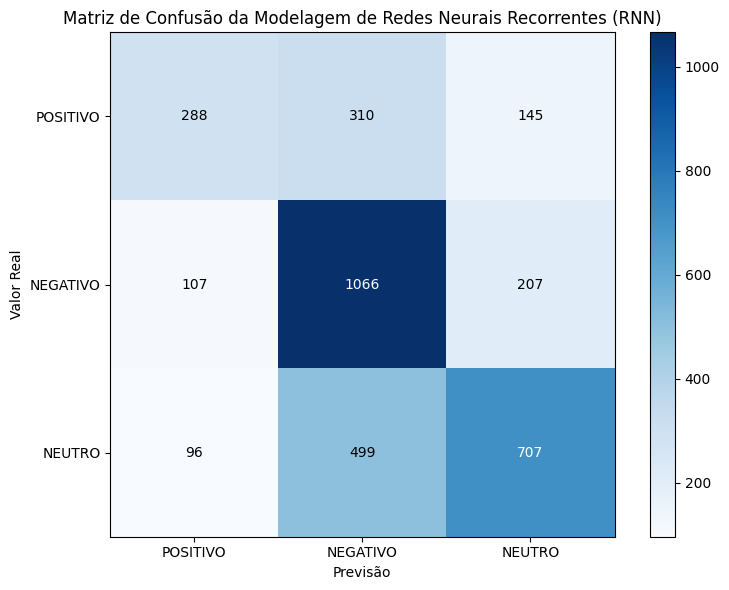

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

### 2.4 - Hiperparâmetros com Random Search do RNN

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_data = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y_labels = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_data, Y_labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_data = (X_data - X_train_mean) / X_train_std

# Função para criar o modelo RNN
def create_model(num_epochs, batch_size, learning_rate, num_hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=num_hidden_units, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
              validation_data=(X_val, y_val))

    y_pred = model.predict(X_data)
    y_pred = np.round(y_pred).flatten()

    recall = recall_score(Y_labels, y_pred, average='macro')
    print('Recall:', recall)

    return model

# Definir a distribuição de valores para cada hiperparâmetro
param_dist = {
    'num_epochs': sp_randint(10, 31),  # Intervalo entre 10 e 30
    'batch_size': sp_randint(32, 129),  # Intervalo entre 32 e 128
    'learning_rate': [0.001, 0.01, 0.1],  # Valores fixos
    'num_hidden_units': sp_randint(64, 257)  # Intervalo entre 64 e 256
}

# Criação do KerasClassifier com a função create_model
keras_classifier = KerasClassifier(build_fn=create_model)

# Realizar a busca aleatória
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall_macro', refit=False, error_score='raise')

random_result = random_search.fit(X_data, Y_labels)

# Obter os resultados da busca aleatória
results = random_result.cv_results_
best_params_idx = results['rank_test_score'].argmin()
best_params = results['params'][best_params_idx]
best_recall = results['mean_test_score'][best_params_idx]

print('Melhores hiperparâmetros:', best_params)
print('Melhor Recall:', best_recall)


<ipython-input-19-3a65faf2cc9d>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model)


Epoch 1/19
63/63 [==============================] - 3s 9ms/step - loss: -10998.0029 - binary_accuracy: 0.4022 - val_loss: -37767.2539 - val_binary_accuracy: 0.4168
Epoch 2/19
63/63 [==============================] - 0s 7ms/step - loss: -110570.0625 - binary_accuracy: 0.4063 - val_loss: -197538.6250 - val_binary_accuracy: 0.4218
Epoch 3/19
63/63 [==============================] - 0s 8ms/step - loss: -352032.0312 - binary_accuracy: 0.4035 - val_loss: -494281.3438 - val_binary_accuracy: 0.4249
Epoch 4/19
63/63 [==============================] - 0s 7ms/step - loss: -732226.1875 - binary_accuracy: 0.4119 - val_loss: -909378.7500 - val_binary_accuracy: 0.4149
Epoch 5/19
63/63 [==============================] - 0s 7ms/step - loss: -1232843.1250 - binary_accuracy: 0.4138 - val_loss: -1458786.6250 - val_binary_accuracy: 0.4093
Epoch 6/19
63/63 [==============================] - 1s 12ms/step - loss: -1891466.8750 - binary_accuracy: 0.4124 - val_loss: -2128403.2500 - val_binary_accuracy: 0.4180
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 1s 6ms/step - loss: -10710.0801 - binary_accuracy: 0.3989 - val_loss: -38630.9375 - val_binary_accuracy: 0.4168
Epoch 2/19
63/63 [==============================] - 0s 4ms/step - loss: -109068.7344 - binary_accuracy: 0.4127 - val_loss: -201508.3281 - val_binary_accuracy: 0.4068
Epoch 3/19
63/63 [==============================] - 0s 4ms/step - loss: -358009.5000 - binary_accuracy: 0.4041 - val_loss: -514398.1250 - val_binary_accuracy: 0.4043
Epoch 4/19
63/63 [==============================] - 0s 4ms/step - loss: -763309.5000 - binary_accuracy: 0.4063 - val_loss: -969755.8750 - val_binary_accuracy: 0.4105
Epoch 5/19
63/63 [==============================] - 0s 4ms/step - loss: -1302535.8750 - binary_accuracy: 0.4079 - val_loss: -1562777.5000 - val_binary_accuracy: 0.4111
Epoch 6/19
63/63 [==============================] - 0s 4ms/step - loss: -1982907.6250 - binary_accuracy: 0.4108 - val_loss: -2265240.2500 - val_binary_accuracy: 0.4143
Epoch 7/19
63

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75/75 [==============================] - 1s 5ms/step - loss: -2.6093 - binary_accuracy: 0.3950 - val_loss: -6.6995 - val_binary_accuracy: 0.4130
Epoch 2/30
75/75 [==============================] - 0s 4ms/step - loss: -15.1249 - binary_accuracy: 0.4066 - val_loss: -25.7153 - val_binary_accuracy: 0.4193
Epoch 3/30
75/75 [==============================] - 0s 4ms/step - loss: -43.6993 - binary_accuracy: 0.4085 - val_loss: -61.5666 - val_binary_accuracy: 0.4186
Epoch 4/30
75/75 [==============================] - 0s 4ms/step - loss: -90.5601 - binary_accuracy: 0.4127 - val_loss: -115.9359 - val_binary_accuracy: 0.4218
Epoch 5/30
75/75 [==============================] - 0s 5ms/step - loss: -155.4233 - binary_accuracy: 0.4146 - val_loss: -185.0265 - val_binary_accuracy: 0.4212
Epoch 6/30
75/75 [==============================] - 0s 6ms/step - loss: -236.8887 - binary_accuracy: 0.4143 - val_loss: -271.2792 - val_binary_accuracy: 0.4212
Epoch 7/30
75/75 [==============================] - 1s 7ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75/75 [==============================] - 1s 6ms/step - loss: -2.6424 - binary_accuracy: 0.3994 - val_loss: -6.2614 - val_binary_accuracy: 0.4130
Epoch 2/30
75/75 [==============================] - 0s 4ms/step - loss: -14.4430 - binary_accuracy: 0.4049 - val_loss: -23.3539 - val_binary_accuracy: 0.4161
Epoch 3/30
75/75 [==============================] - 0s 4ms/step - loss: -40.1679 - binary_accuracy: 0.4113 - val_loss: -54.7871 - val_binary_accuracy: 0.4212
Epoch 4/30
75/75 [==============================] - 0s 4ms/step - loss: -82.3323 - binary_accuracy: 0.4132 - val_loss: -100.8638 - val_binary_accuracy: 0.4199
Epoch 5/30
75/75 [==============================] - 0s 4ms/step - loss: -140.8924 - binary_accuracy: 0.4158 - val_loss: -163.5616 - val_binary_accuracy: 0.4218
Epoch 6/30
75/75 [==============================] - 0s 4ms/step - loss: -216.8493 - binary_accuracy: 0.4140 - val_loss: -241.3579 - val_binary_accuracy: 0.4218
Epoch 7/30
75/75 [==============================] - 0s 4ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


51/51 [==============================] - 1s 7ms/step - loss: -30.1472 - binary_accuracy: 0.3989 - val_loss: -96.4607 - val_binary_accuracy: 0.4161
Epoch 2/10
51/51 [==============================] - 0s 4ms/step - loss: -290.4126 - binary_accuracy: 0.4121 - val_loss: -521.8524 - val_binary_accuracy: 0.4199
Epoch 3/10
51/51 [==============================] - 0s 4ms/step - loss: -987.3118 - binary_accuracy: 0.4113 - val_loss: -1419.3796 - val_binary_accuracy: 0.4237
Epoch 4/10
51/51 [==============================] - 0s 4ms/step - loss: -2224.9729 - binary_accuracy: 0.4121 - val_loss: -2802.9724 - val_binary_accuracy: 0.4218
Epoch 5/10
51/51 [==============================] - 0s 4ms/step - loss: -3995.5210 - binary_accuracy: 0.4099 - val_loss: -4683.2222 - val_binary_accuracy: 0.4293
Epoch 6/10
51/51 [==============================] - 0s 4ms/step - loss: -6277.1230 - binary_accuracy: 0.4138 - val_loss: -7009.3604 - val_binary_accuracy: 0.4193
Epoch 7/10
51/51 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


51/51 [==============================] - 1s 7ms/step - loss: -34.0592 - binary_accuracy: 0.4021 - val_loss: -109.5831 - val_binary_accuracy: 0.4186
Epoch 2/10
51/51 [==============================] - 0s 5ms/step - loss: -310.3800 - binary_accuracy: 0.4102 - val_loss: -569.2783 - val_binary_accuracy: 0.4218
Epoch 3/10
51/51 [==============================] - 0s 5ms/step - loss: -1030.3099 - binary_accuracy: 0.4121 - val_loss: -1488.7765 - val_binary_accuracy: 0.4174
Epoch 4/10
51/51 [==============================] - 0s 4ms/step - loss: -2267.7546 - binary_accuracy: 0.4136 - val_loss: -2889.3445 - val_binary_accuracy: 0.4168
Epoch 5/10
51/51 [==============================] - 0s 4ms/step - loss: -4026.7969 - binary_accuracy: 0.4107 - val_loss: -4758.6118 - val_binary_accuracy: 0.4105
Epoch 6/10
51/51 [==============================] - 0s 4ms/step - loss: -6254.6133 - binary_accuracy: 0.4072 - val_loss: -7138.6597 - val_binary_accuracy: 0.4180
Epoch 7/10
51/51 [==========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


52/52 [==============================] - 1s 7ms/step - loss: -6894.3774 - binary_accuracy: 0.3997 - val_loss: -23456.6504 - val_binary_accuracy: 0.4155
Epoch 2/17
52/52 [==============================] - 0s 6ms/step - loss: -67589.6953 - binary_accuracy: 0.4107 - val_loss: -125575.8516 - val_binary_accuracy: 0.4174
Epoch 3/17
52/52 [==============================] - 0s 5ms/step - loss: -223244.0156 - binary_accuracy: 0.4115 - val_loss: -323616.6562 - val_binary_accuracy: 0.4118
Epoch 4/17
52/52 [==============================] - 0s 6ms/step - loss: -481442.1875 - binary_accuracy: 0.4122 - val_loss: -620784.0000 - val_binary_accuracy: 0.4105
Epoch 5/17
52/52 [==============================] - 0s 5ms/step - loss: -840892.1250 - binary_accuracy: 0.4068 - val_loss: -1015079.6250 - val_binary_accuracy: 0.4111
Epoch 6/17
52/52 [==============================] - 0s 6ms/step - loss: -1297556.2500 - binary_accuracy: 0.4107 - val_loss: -1496111.8750 - val_binary_accuracy: 0.4118
Epoch 7/17
52/52

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


52/52 [==============================] - 1s 6ms/step - loss: -7234.6489 - binary_accuracy: 0.3988 - val_loss: -24260.2676 - val_binary_accuracy: 0.4161
Epoch 2/17
52/52 [==============================] - 0s 4ms/step - loss: -70899.5234 - binary_accuracy: 0.4124 - val_loss: -129178.4844 - val_binary_accuracy: 0.4143
Epoch 3/17
52/52 [==============================] - 0s 4ms/step - loss: -228874.8125 - binary_accuracy: 0.4083 - val_loss: -330565.6562 - val_binary_accuracy: 0.4130
Epoch 4/17
52/52 [==============================] - 0s 4ms/step - loss: -490044.5625 - binary_accuracy: 0.4061 - val_loss: -628375.6875 - val_binary_accuracy: 0.4130
Epoch 5/17
52/52 [==============================] - 0s 4ms/step - loss: -854178.0625 - binary_accuracy: 0.4088 - val_loss: -1021482.3125 - val_binary_accuracy: 0.4099
Epoch 6/17
52/52 [==============================] - 0s 5ms/step - loss: -1314723.5000 - binary_accuracy: 0.4107 - val_loss: -1509485.1250 - val_binary_accuracy: 0.4099
Epoch 7/17
52/52

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 1s 5ms/step - loss: -29150.3848 - binary_accuracy: 0.4063 - val_loss: -97223.0859 - val_binary_accuracy: 0.4124
Epoch 2/24
94/94 [==============================] - 0s 3ms/step - loss: -270248.0000 - binary_accuracy: 0.4088 - val_loss: -478271.8125 - val_binary_accuracy: 0.4136
Epoch 3/24
94/94 [==============================] - 0s 3ms/step - loss: -824336.7500 - binary_accuracy: 0.4080 - val_loss: -1163830.1250 - val_binary_accuracy: 0.4118
Epoch 4/24
94/94 [==============================] - 0s 4ms/step - loss: -1700208.7500 - binary_accuracy: 0.4074 - val_loss: -2154993.0000 - val_binary_accuracy: 0.4099
Epoch 5/24
94/94 [==============================] - 0s 5ms/step - loss: -2884608.2500 - binary_accuracy: 0.4121 - val_loss: -3422021.2500 - val_binary_accuracy: 0.4124
Epoch 6/24
94/94 [==============================] - 1s 5ms/step - loss: -4348410.0000 - binary_accuracy: 0.4083 - val_loss: -4993379.5000 - val_binary_accuracy: 0.4149
Epoch 7/24

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 1s 5ms/step - loss: -31316.5000 - binary_accuracy: 0.3999 - val_loss: -101747.1875 - val_binary_accuracy: 0.3961
Epoch 2/24
94/94 [==============================] - 0s 3ms/step - loss: -287518.4062 - binary_accuracy: 0.4055 - val_loss: -493448.4375 - val_binary_accuracy: 0.4124
Epoch 3/24
94/94 [==============================] - 0s 3ms/step - loss: -860003.0625 - binary_accuracy: 0.4049 - val_loss: -1180922.1250 - val_binary_accuracy: 0.4068
Epoch 4/24
94/94 [==============================] - 0s 3ms/step - loss: -1739995.0000 - binary_accuracy: 0.4064 - val_loss: -2171158.0000 - val_binary_accuracy: 0.4074
Epoch 5/24
94/94 [==============================] - 0s 3ms/step - loss: -2917927.7500 - binary_accuracy: 0.4094 - val_loss: -3411395.7500 - val_binary_accuracy: 0.4093
Epoch 6/24
94/94 [==============================] - 0s 3ms/step - loss: -4376768.0000 - binary_accuracy: 0.4096 - val_loss: -4948655.5000 - val_binary_accuracy: 0.4136
Epoch 7/2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117/117 [==============================] - 2s 6ms/step - loss: -47890.3828 - binary_accuracy: 0.3982 - val_loss: -159130.7344 - val_binary_accuracy: 0.4024
Epoch 2/25
117/117 [==============================] - 0s 4ms/step - loss: -439185.6562 - binary_accuracy: 0.4099 - val_loss: -767658.4375 - val_binary_accuracy: 0.4086
Epoch 3/25
117/117 [==============================] - 0s 4ms/step - loss: -1301106.1250 - binary_accuracy: 0.4069 - val_loss: -1799965.7500 - val_binary_accuracy: 0.4143
Epoch 4/25
117/117 [==============================] - 0s 4ms/step - loss: -2628499.5000 - binary_accuracy: 0.4079 - val_loss: -3287674.0000 - val_binary_accuracy: 0.4093
Epoch 5/25
117/117 [==============================] - 0s 4ms/step - loss: -4415953.0000 - binary_accuracy: 0.4096 - val_loss: -5200530.0000 - val_binary_accuracy: 0.4111
Epoch 6/25
117/117 [==============================] - 0s 4ms/step - loss: -6603377.5000 - binary_accuracy: 0.4079 - val_loss: -7481091.0000 - val_binary_accuracy: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117/117 [==============================] - 1s 5ms/step - loss: -47282.8281 - binary_accuracy: 0.4035 - val_loss: -157749.9688 - val_binary_accuracy: 0.4161
Epoch 2/25
117/117 [==============================] - 0s 4ms/step - loss: -430431.1562 - binary_accuracy: 0.4063 - val_loss: -750403.6250 - val_binary_accuracy: 0.4149
Epoch 3/25
117/117 [==============================] - 0s 4ms/step - loss: -1285373.3750 - binary_accuracy: 0.4071 - val_loss: -1798537.2500 - val_binary_accuracy: 0.4205
Epoch 4/25
117/117 [==============================] - 1s 5ms/step - loss: -2594778.2500 - binary_accuracy: 0.4094 - val_loss: -3244144.5000 - val_binary_accuracy: 0.4136
Epoch 5/25
117/117 [==============================] - 0s 4ms/step - loss: -4318705.0000 - binary_accuracy: 0.4107 - val_loss: -5093881.0000 - val_binary_accuracy: 0.4118
Epoch 6/25
117/117 [==============================] - 1s 4ms/step - loss: -6462618.0000 - binary_accuracy: 0.4097 - val_loss: -7334926.0000 - val_binary_accuracy: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134/134 [==============================] - 2s 5ms/step - loss: -447.7313 - binary_accuracy: 0.4049 - val_loss: -1468.9532 - val_binary_accuracy: 0.4180
Epoch 2/16
134/134 [==============================] - 1s 4ms/step - loss: -4262.7148 - binary_accuracy: 0.4097 - val_loss: -7402.2729 - val_binary_accuracy: 0.4174
Epoch 3/16
134/134 [==============================] - 1s 4ms/step - loss: -13296.2920 - binary_accuracy: 0.4094 - val_loss: -18167.6562 - val_binary_accuracy: 0.4099
Epoch 4/16
134/134 [==============================] - 1s 4ms/step - loss: -27539.3594 - binary_accuracy: 0.4072 - val_loss: -33569.0977 - val_binary_accuracy: 0.4118
Epoch 5/16
134/134 [==============================] - 0s 4ms/step - loss: -46196.4492 - binary_accuracy: 0.4080 - val_loss: -52896.7969 - val_binary_accuracy: 0.4086
Epoch 6/16
134/134 [==============================] - 1s 4ms/step - loss: -69444.5000 - binary_accuracy: 0.4088 - val_loss: -76617.3438 - val_binary_accuracy: 0.4174
Epoch 7/16
134/134 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134/134 [==============================] - 2s 5ms/step - loss: -384.5032 - binary_accuracy: 0.4041 - val_loss: -1306.8723 - val_binary_accuracy: 0.4174
Epoch 2/16
134/134 [==============================] - 0s 4ms/step - loss: -3814.8115 - binary_accuracy: 0.4127 - val_loss: -6641.0513 - val_binary_accuracy: 0.4130
Epoch 3/16
134/134 [==============================] - 1s 4ms/step - loss: -12043.1406 - binary_accuracy: 0.4093 - val_loss: -16663.0078 - val_binary_accuracy: 0.4061
Epoch 4/16
134/134 [==============================] - 0s 4ms/step - loss: -25002.8691 - binary_accuracy: 0.4060 - val_loss: -30537.9375 - val_binary_accuracy: 0.4130
Epoch 5/16
134/134 [==============================] - 0s 4ms/step - loss: -41987.5977 - binary_accuracy: 0.4097 - val_loss: -48047.6289 - val_binary_accuracy: 0.4130
Epoch 6/16
134/134 [==============================] - 0s 4ms/step - loss: -62638.2227 - binary_accuracy: 0.4113 - val_loss: -69154.5312 - val_binary_accuracy: 0.4143
Epoch 7/16
134/134 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


97/97 [==============================] - 2s 5ms/step - loss: -269.8940 - binary_accuracy: 0.4043 - val_loss: -885.3948 - val_binary_accuracy: 0.4161
Epoch 2/18
97/97 [==============================] - 0s 4ms/step - loss: -2631.2935 - binary_accuracy: 0.4116 - val_loss: -4603.2158 - val_binary_accuracy: 0.4155
Epoch 3/18
97/97 [==============================] - 0s 4ms/step - loss: -8452.3428 - binary_accuracy: 0.4093 - val_loss: -11708.7012 - val_binary_accuracy: 0.4149
Epoch 4/18
97/97 [==============================] - 0s 4ms/step - loss: -17945.0332 - binary_accuracy: 0.4113 - val_loss: -22309.7168 - val_binary_accuracy: 0.4124
Epoch 5/18
97/97 [==============================] - 0s 4ms/step - loss: -31031.3535 - binary_accuracy: 0.4088 - val_loss: -36089.8164 - val_binary_accuracy: 0.4186
Epoch 6/18
97/97 [==============================] - 0s 4ms/step - loss: -47438.1016 - binary_accuracy: 0.4111 - val_loss: -52717.8633 - val_binary_accuracy: 0.4111
Epoch 7/18
97/97 [================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


97/97 [==============================] - 2s 8ms/step - loss: -311.4056 - binary_accuracy: 0.4041 - val_loss: -1022.3105 - val_binary_accuracy: 0.4149
Epoch 2/18
97/97 [==============================] - 1s 6ms/step - loss: -2969.8748 - binary_accuracy: 0.4122 - val_loss: -5252.7939 - val_binary_accuracy: 0.4218
Epoch 3/18
97/97 [==============================] - 0s 4ms/step - loss: -9231.4043 - binary_accuracy: 0.4133 - val_loss: -12864.7188 - val_binary_accuracy: 0.4186
Epoch 4/18
97/97 [==============================] - 0s 4ms/step - loss: -19041.6113 - binary_accuracy: 0.4118 - val_loss: -23710.0977 - val_binary_accuracy: 0.4105
Epoch 5/18
97/97 [==============================] - 0s 4ms/step - loss: -32320.3203 - binary_accuracy: 0.4099 - val_loss: -37775.5000 - val_binary_accuracy: 0.4149
Epoch 6/18
97/97 [==============================] - 0s 4ms/step - loss: -48795.2578 - binary_accuracy: 0.4086 - val_loss: -55004.2539 - val_binary_accuracy: 0.4161
Epoch 7/18
97/97 [===============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 1s 7ms/step - loss: -13385.7646 - binary_accuracy: 0.3969 - val_loss: -46149.1680 - val_binary_accuracy: 0.4161
Epoch 2/23
58/58 [==============================] - 0s 4ms/step - loss: -130574.7266 - binary_accuracy: 0.4097 - val_loss: -233470.1250 - val_binary_accuracy: 0.4130
Epoch 3/23
58/58 [==============================] - 0s 5ms/step - loss: -416763.0312 - binary_accuracy: 0.4046 - val_loss: -591171.2500 - val_binary_accuracy: 0.4018
Epoch 4/23
58/58 [==============================] - 0s 5ms/step - loss: -879625.1875 - binary_accuracy: 0.4088 - val_loss: -1116926.7500 - val_binary_accuracy: 0.4105
Epoch 5/23
58/58 [==============================] - 0s 4ms/step - loss: -1523353.0000 - binary_accuracy: 0.4083 - val_loss: -1805142.5000 - val_binary_accuracy: 0.4143
Epoch 6/23
58/58 [==============================] - 0s 5ms/step - loss: -2317302.5000 - binary_accuracy: 0.4064 - val_loss: -2630195.5000 - val_binary_accuracy: 0.4149
Epoch 7/23
5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


58/58 [==============================] - 1s 6ms/step - loss: -12731.0352 - binary_accuracy: 0.4028 - val_loss: -44720.2344 - val_binary_accuracy: 0.4136
Epoch 2/23
58/58 [==============================] - 0s 4ms/step - loss: -123837.3438 - binary_accuracy: 0.4129 - val_loss: -226185.2656 - val_binary_accuracy: 0.4105
Epoch 3/23
58/58 [==============================] - 0s 4ms/step - loss: -389588.5938 - binary_accuracy: 0.4086 - val_loss: -567066.5625 - val_binary_accuracy: 0.4093
Epoch 4/23
58/58 [==============================] - 0s 4ms/step - loss: -834412.8750 - binary_accuracy: 0.4066 - val_loss: -1087673.2500 - val_binary_accuracy: 0.4111
Epoch 5/23
58/58 [==============================] - 0s 4ms/step - loss: -1429133.7500 - binary_accuracy: 0.4068 - val_loss: -1728061.0000 - val_binary_accuracy: 0.4149
Epoch 6/23
58/58 [==============================] - 0s 4ms/step - loss: -2203219.2500 - binary_accuracy: 0.4119 - val_loss: -2551544.7500 - val_binary_accuracy: 0.4130
Epoch 7/23
5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89/89 [==============================] - 1s 5ms/step - loss: -96.7241 - binary_accuracy: 0.4014 - val_loss: -315.7679 - val_binary_accuracy: 0.4230
Epoch 2/29
89/89 [==============================] - 0s 5ms/step - loss: -960.0638 - binary_accuracy: 0.4088 - val_loss: -1725.0250 - val_binary_accuracy: 0.4199
Epoch 3/29
89/89 [==============================] - 0s 5ms/step - loss: -3106.8691 - binary_accuracy: 0.4107 - val_loss: -4374.7598 - val_binary_accuracy: 0.4255
Epoch 4/29
89/89 [==============================] - 1s 6ms/step - loss: -6520.9229 - binary_accuracy: 0.4130 - val_loss: -8202.6592 - val_binary_accuracy: 0.4149
Epoch 5/29
89/89 [==============================] - 0s 5ms/step - loss: -11122.1660 - binary_accuracy: 0.4107 - val_loss: -13016.1279 - val_binary_accuracy: 0.4111
Epoch 6/29
89/89 [==============================] - 0s 5ms/step - loss: -16897.3047 - binary_accuracy: 0.4089 - val_loss: -18929.3320 - val_binary_accuracy: 0.4118
Epoch 7/29
89/89 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89/89 [==============================] - 1s 5ms/step - loss: -117.5894 - binary_accuracy: 0.4039 - val_loss: -367.1731 - val_binary_accuracy: 0.4186
Epoch 2/29
89/89 [==============================] - 0s 4ms/step - loss: -1050.7383 - binary_accuracy: 0.4160 - val_loss: -1859.8152 - val_binary_accuracy: 0.4180
Epoch 3/29
89/89 [==============================] - 0s 4ms/step - loss: -3290.0588 - binary_accuracy: 0.4111 - val_loss: -4628.0747 - val_binary_accuracy: 0.4212
Epoch 4/29
89/89 [==============================] - 0s 4ms/step - loss: -6786.1445 - binary_accuracy: 0.4115 - val_loss: -8545.9678 - val_binary_accuracy: 0.4149
Epoch 5/29
89/89 [==============================] - 0s 4ms/step - loss: -11546.5459 - binary_accuracy: 0.4121 - val_loss: -13621.1963 - val_binary_accuracy: 0.4105
Epoch 6/29
89/89 [==============================] - 0s 4ms/step - loss: -17528.9395 - binary_accuracy: 0.4082 - val_loss: -19845.5059 - val_binary_accuracy: 0.4105
Epoch 7/29
89/89 [===================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.4.1 - RNN com os Melhores Hiperparâmetros

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Função para criar o modelo RNN com hiperparâmetros otimizados
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=125, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=14, batch_size=47,
              validation_data=(X_val, y_val))

    return model

# Criação do modelo com hiperparâmetros otimizados
best_model = create_model()

# Previsões do modelo com hiperparâmetros otimizados
y_pred_best_model = best_model.predict(X_test)
y_pred_best_model = np.round(y_pred_best_model).flatten()

# Cálculo do recall geral
recall_best_model = recall_score(y_test, y_pred_best_model, average='weighted')

RNNRecall = recall_best_model

print('Recall:', recall_best_model)


Epoch 1/14
136/136 [==============================] - 1s 4ms/step - loss: -3.7510 - binary_accuracy: 0.3986 - val_loss: -9.3404 - val_binary_accuracy: 0.4155
Epoch 2/14
136/136 [==============================] - 0s 3ms/step - loss: -22.7753 - binary_accuracy: 0.4099 - val_loss: -36.9204 - val_binary_accuracy: 0.4193
Epoch 3/14
136/136 [==============================] - 0s 3ms/step - loss: -64.0433 - binary_accuracy: 0.4124 - val_loss: -86.4815 - val_binary_accuracy: 0.4212
Epoch 4/14
136/136 [==============================] - 0s 3ms/step - loss: -129.8826 - binary_accuracy: 0.4161 - val_loss: -160.5403 - val_binary_accuracy: 0.4237
Epoch 5/14
136/136 [==============================] - 0s 4ms/step - loss: -220.7150 - binary_accuracy: 0.4168 - val_loss: -255.5498 - val_binary_accuracy: 0.4224
Epoch 6/14
136/136 [==============================] - 0s 3ms/step - loss: -334.9346 - binary_accuracy: 0.4138 - val_loss: -373.3757 - val_binary_accuracy: 0.4230
Epoch 7/14
136/136 [================

### 2.5 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

In [21]:
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred_best_model})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsRNN3SB.csv', index=False)
print("Salvo com sucesso")

Salvo com sucesso


### 2.6 - Exportar o Modelo de Redes Neurais Recorrentes (RNN) com pickle

In [22]:
#biblioteca para exportação dos modelos
import pickle

# Salvar o modelo RNN em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_rnn.pkl', 'wb') as arquivo:
    pickle.dump(best_model, arquivo)

## RNN - Três categorias e com balanceamento

### 2.2 - Teste da Função

**USANDO TRÊS CATEGORIAS COM BALANCEAMENTO DE DADOS**

In [23]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative, df_neutral_resampled])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
71/71 [==============================] - 2s 3ms/step - loss: 1.0505 - accuracy: 0.4573
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9794 - accuracy: 0.5603
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9581 - accuracy: 0.5744
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.5889
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9266 - accuracy: 0.5885
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.9184 - accuracy: 0.5968
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9093 - accuracy: 0.5986
Epoch 8/10
71/71 [==============================] - 0s 3ms/step - loss: 0.9061 - accuracy: 0.6026
Epoch 9/10
71/71 [==============================] - 0s 4ms/step - loss: 0.8996 - accuracy: 0.6096
Epoch 10/10
71/71 [==============================] - 1s 4ms/step - loss: 0.8861 - accuracy: 0.6052
Acurácia: 60.52%
71

### 2.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS COM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

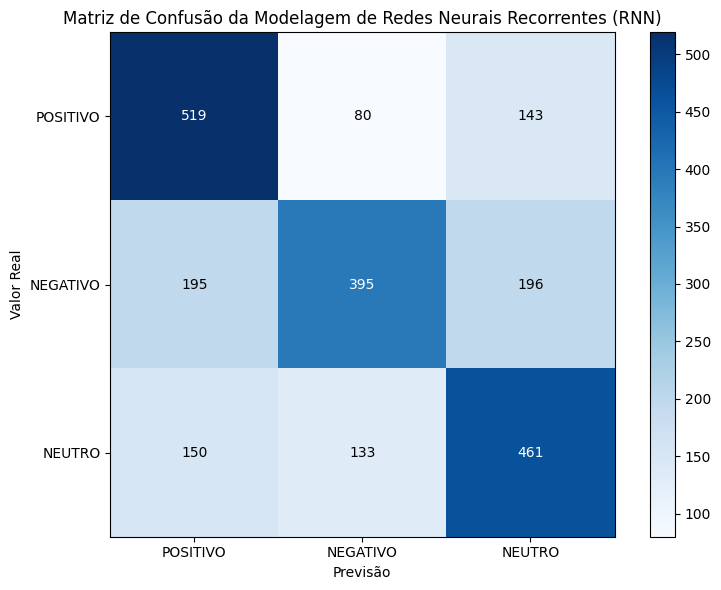

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

### 2.4 - Salvando CSV do resultado da Modelagem de Redes Neurais Recorrentes (RNN)

In [25]:
"""
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsRNN3CB.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Criar DataFrame com as previsões\ndf_predictions = pd.DataFrame({\'Sentimento Real\': y_test, \'Sentimento Previsto\': y_pred})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_predictions.to_csv(\'predictionsRNN3CB.csv\', index=False)\nprint("Salvo com sucesso")\n'

# Atividade 3 - Implementação do Embedding Layer com Word2Vec

O modelo de aprendizado profundo utilizado, que inclui as camadas de incorporação (Embedding), convolução unidimensional (Conv1D), pooling máximo global (GlobalMaxPooling1D) e camadas densas (Dense), traz benefícios significativos para o Processamento de Linguagem Natural (PLN).

Essas camadas são projetadas para lidar especificamente com dados textuais e têm vantagens específicas:

A camada de incorporação (Embedding) permite a representação eficiente de palavras em vetores densos de tamanho fixo, capturando relações semânticas e contextuais entre as palavras. Isso é fundamental para o PLN, pois possibilita que o modelo compreenda melhor as similaridades e diferenças entre as palavras em um texto, melhorando a capacidade de generalização e entendimento do contexto.

A camada convolucional unidimensional (Conv1D) é capaz de identificar padrões locais em sequências de palavras, como combinações específicas de palavras ou frases. Isso permite que o modelo extraia características relevantes dos dados textuais, capturando informações importantes em diferentes níveis de granularidade. A convolução unidimensional é especialmente útil para identificar características importantes em trechos curtos de texto.

A camada de pooling máximo global (GlobalMaxPooling1D) reduz a dimensionalidade dos recursos extraídos pela camada convolucional, mantendo as características mais importantes. Essa operação de pooling preserva as informações mais salientes, tornando o modelo mais robusto a variações na posição das características dentro das sequências. Além disso, o pooling máximo global permite que o modelo trabalhe com sequências de comprimentos variáveis, já que retorna um vetor de características fixo independentemente do tamanho da sequência original.

As camadas densas (Dense) são responsáveis por aprender padrões mais complexos nos recursos extraídos pelas camadas anteriores. Elas permitem que o modelo capture relações não lineares entre as características, aumentando a capacidade de representação e aprendizado. As camadas densas são cruciais para a tomada de decisões finais do modelo, mapeando os recursos em probabilidades de pertencer a cada classe e permitindo a classificação adequada dos dados textuais.

Portanto, o uso dessas camadas no modelo de aprendizado profundo para PLN traz ganhos significativos, permitindo que o modelo compreenda melhor o contexto, identifique padrões relevantes nas sequências de palavras e capture informações importantes para a classificação precisa dos dados textuais. Essa arquitetura é especialmente útil para tarefas como classificação de sentimentos, análise de sentimento, categorização de texto e muitas outras aplicações de PLN.

**Referências**

(1) What Are Embedding Layers in Neural Networks? - Baeldung.

https://www.baeldung.com/cs/neural-nets-embedding-layers.

(2) Understanding Embedding Layer in Keras | by sawan saxena - Medium.

https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce.

(3) Embedding layer - Keras.

https://keras.io/api/layers/core_layers/embedding/.

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer

## 3.1 - Definição da Função

In [27]:
def classification_embedding_layer(X, y):
  # Separar em conjuntos de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Tokenizar os dados
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)

  # Obter o tamanho do vocabulário
  vocab_size = len(tokenizer.word_index) + 1

  # Padding para ter sequências com o mesmo comprimento
  max_length = 50
  X_train = pad_sequences(X_train, maxlen=max_length)
  X_test = pad_sequences(X_test, maxlen=max_length)

  # Criar o modelo
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
  model.add(LSTM(128))
  model.add(Dense(3, activation='softmax'))

  # Compilar o modelo
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_train, y_train, epochs=10, batch_size=32)

  # Fazer previsões no conjunto de teste
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)

  # Printar o relatório de classificação (incluindo recall)
  labels = ['Negative', 'Positive', 'Neutral']

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  report = classification_report(y_test, y_pred, target_names=labels)
  print(report)

  return model, y_test, y_pred

## Embedding Layer - Duas categorias e com balanceamento

### 3.2 - Teste de Função

In [28]:
"""
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced['Frase'])
Y = np.array(dfrnn_balanced['sentimento'])

# Definição dos hiperparâmetros
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_hidden_units = 128
embedding_dim = 50

loss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)
"""

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced['Frase'])\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Definição dos hiperparâmetros\nnum_epochs = 20\nbatch_size = 64\nlearning_rate = 0.001\nnum_hidden_units = 128\nembedding_dim = 50\n\nloss, accuracy, y_pred, y_test, X_test = classification_embedding_layer(X, Y, num_epochs, batch_size, learning_rate, num_hidden_units, embedding_dim)\n"

### 14.3 - Visualização da Matriz de Confusão do Embedding Layer

In [29]:
"""
# Calcular a matriz de confusão
confusion = confusion_matrix(y_pred,y_test)

print("Matriz de Confusão:")
print(confusion)
"""

'\n# Calcular a matriz de confusão\nconfusion = confusion_matrix(y_pred,y_test)\n\nprint("Matriz de Confusão:")\nprint(confusion)\n'

A matriz de confusão que você obteve mostra os seguintes resultados:

- Verdadeiros Positivos (TP): 127
- Falsos Positivos (FP): 38
- Falsos Negativos (FN): 25
- Verdadeiros Negativos (TN): 141

In [30]:
"""
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO']

# Criação da matriz de confusão personalizada
cm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Embedding Layer com Word2Vec')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm_custom.max() / 2.0
for i, j in np.ndindex(cm_custom.shape):
    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',
             color='white' if cm_custom[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
"""

"\n# Cálculo da matriz de confusão\ncm = confusion_matrix(y_test, y_pred)\n\n# Definição dos rótulos das classes\nclass_labels = ['POSITIVO', 'NEGATIVO']\n\n# Criação da matriz de confusão personalizada\ncm_custom = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(cm_custom, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão do Embedding Layer com Word2Vec')\nplt.colorbar()\ntick_marks = np.arange(len(class_labels))\nplt.xticks(tick_marks, class_labels)\nplt.yticks(tick_marks, class_labels)\n\n# Adição dos valores numéricos na matriz\nthresh = cm_custom.max() / 2.0\nfor i, j in np.ndindex(cm_custom.shape):\n    plt.text(j, i, format(cm_custom[i, j], 'd'), ha='center', va='center',\n             color='white' if cm_custom[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt.tight_layout()\nplt.show()\n"

### 3.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [31]:
"""
import pandas as pd

# Converter X_test em lista e y_pred em array unidimensional
X_test_list = X_test.tolist()
y_pred_flat = y_pred.flatten()

# Criar um DataFrame com as previsões
df_resultEL = pd.DataFrame({'Texto': X_test_list, 'Sentimento_Predito': y_pred_flat})

# Salvar o DataFrame em um arquivo CSV
df_resultEL.to_csv('/content/drive/MyDrive/PROJETO BTG/resultados.csv', index=False)
print("Salvo com sucesso")
"""

'\nimport pandas as pd\n\n# Converter X_test em lista e y_pred em array unidimensional\nX_test_list = X_test.tolist()\ny_pred_flat = y_pred.flatten()\n\n# Criar um DataFrame com as previsões\ndf_resultEL = pd.DataFrame({\'Texto\': X_test_list, \'Sentimento_Predito\': y_pred_flat})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_resultEL.to_csv(\'/content/drive/MyDrive/PROJETO BTG/resultados.csv\', index=False)\nprint("Salvo com sucesso")\n'

In [32]:
# df_resultEL

## Embedding Layer - Três categorias e sem balanceamento

### 3.2 - Teste de Função

In [33]:
# Carregar os dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

Epoch 1/10
250/250 [==============================] - 38s 144ms/step - loss: 0.8799 - accuracy: 0.5892
Epoch 2/10
250/250 [==============================] - 20s 80ms/step - loss: 0.4914 - accuracy: 0.8065
Epoch 3/10
250/250 [==============================] - 12s 46ms/step - loss: 0.2617 - accuracy: 0.9060
Epoch 4/10
250/250 [==============================] - 6s 25ms/step - loss: 0.1607 - accuracy: 0.9401
Epoch 5/10
250/250 [==============================] - 4s 17ms/step - loss: 0.1141 - accuracy: 0.9597
Epoch 6/10
250/250 [==============================] - 6s 26ms/step - loss: 0.0907 - accuracy: 0.9691
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0769 - accuracy: 0.9743
Epoch 8/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0665 - accuracy: 0.9783
Epoch 9/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0611 - accuracy: 0.9795
Epoch 10/10
108/108 [==============================] - 1s 5ms/step - loss: 1.4159 - acc

### 3.3 - Visualização da Matriz de Confusão do Embedding Layer

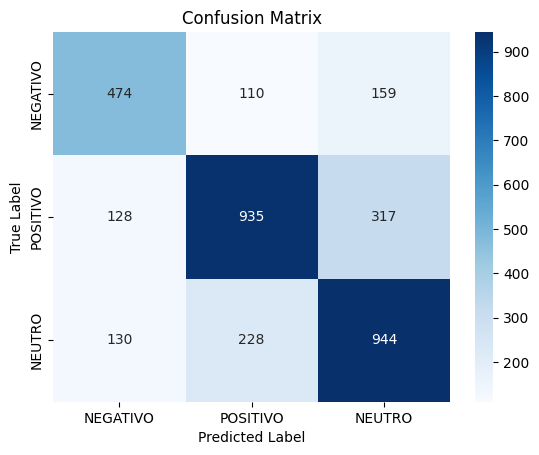

In [34]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Printar a matriz de confusão
labels = ['NEGATIVO', 'POSITIVO', 'NEUTRO']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 3.4 - Hiperparâmetros com Random Search do Embedding Layer

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(embedding_dim, vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=3, activation='softmax')  # Altere o número de unidades para o número de classes
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Melhores hiperparâmetros encontrados
best_embedding_dim = 100
best_batch_size = 32

# Criação do modelo com os melhores hiperparâmetros
model = create_model(best_embedding_dim, vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=best_batch_size, epochs=10, validation_split=0.2)

# Avaliação do modelo
y_pred = model.predict(X_padded)
y_pred = np.argmax(y_pred, axis=1)  # Converter as previsões para as classes numéricas
recall = recall_score(Y, y_pred, average='weighted')

print('Recall:', recall)


Epoch 1/10
286/286 [==============================] - 60s 188ms/step - loss: 0.7974 - accuracy: 0.6460 - val_loss: 1.6051 - val_accuracy: 0.3031
Epoch 2/10
286/286 [==============================] - 24s 84ms/step - loss: 0.3562 - accuracy: 0.8721 - val_loss: 1.4739 - val_accuracy: 0.4402
Epoch 3/10
286/286 [==============================] - 19s 68ms/step - loss: 0.1153 - accuracy: 0.9650 - val_loss: 1.7743 - val_accuracy: 0.4661
Epoch 4/10
286/286 [==============================] - 13s 46ms/step - loss: 0.0658 - accuracy: 0.9817 - val_loss: 2.0314 - val_accuracy: 0.4577
Epoch 5/10
286/286 [==============================] - 5s 19ms/step - loss: 0.0514 - accuracy: 0.9863 - val_loss: 2.3228 - val_accuracy: 0.4152
Epoch 6/10
286/286 [==============================] - 8s 27ms/step - loss: 0.0378 - accuracy: 0.9898 - val_loss: 2.3031 - val_accuracy: 0.4008
Epoch 7/10
286/286 [==============================] - 6s 20ms/step - loss: 0.0335 - accuracy: 0.9915 - val_loss: 2.2644 - val_accuracy: 0

### 3.4.1 - Embedding Layer com os Melhores Hiperparâmetros

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import recall_score

def create_model(vocab_size, max_length):
    # Criação do modelo
    model = Sequential([
        Embedding(vocab_size, 100, input_length=max_length),  # Aplicação do melhor hiperparâmetro
        Conv1D(32, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(units=128, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])

    return model

# Dados de entrada
X = dfrnn_balanced['Frase'].values
Y = dfrnn_balanced['sentimento2'].values

# Tokenização
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# Criação do modelo com o melhor hiperparâmetro
model = create_model(vocab_size, max_length)

# Treinamento do modelo
model.fit(X_padded, Y, batch_size=32, epochs=10, validation_split=0.2)

# Avaliação do modelo
loss, accuracy, recall = model.evaluate(X_padded, Y)

ELRecall = recall;

print('Recall:', ELRecall)


Epoch 1/10
286/286 [==============================] - 39s 132ms/step - loss: -3.0537 - accuracy: 0.5041 - recall: 0.9924 - val_loss: -221.9660 - val_accuracy: 0.0000e+00 - val_recall: 0.9834
Epoch 2/10
286/286 [==============================] - 21s 72ms/step - loss: -852.8340 - accuracy: 0.5440 - recall: 0.9834 - val_loss: -19547.0723 - val_accuracy: 0.0000e+00 - val_recall: 0.9847
Epoch 3/10
286/286 [==============================] - 13s 43ms/step - loss: -11105.5791 - accuracy: 0.5530 - recall: 0.9843 - val_loss: -141712.0312 - val_accuracy: 0.0000e+00 - val_recall: 0.9838
Epoch 4/10
286/286 [==============================] - 10s 34ms/step - loss: -52417.9102 - accuracy: 0.5564 - recall: 0.9853 - val_loss: -512954.0312 - val_accuracy: 0.0000e+00 - val_recall: 0.9842
Epoch 5/10
286/286 [==============================] - 7s 25ms/step - loss: -158991.8438 - accuracy: 0.5558 - recall: 0.9862 - val_loss: -1278172.6250 - val_accuracy: 0.0000e+00 - val_recall: 0.9855
Epoch 6/10
286/286 [===

### 3.5 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [37]:
"""
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsEmbeddingLayer.csv', index=False)
print("Salvo com sucesso")
"""

'\n# Criar DataFrame com as previsões\ndf_predictions = pd.DataFrame({\'Sentimento Real\': y_test, \'Sentimento Previsto\': y_pred})\n\n# Salvar o DataFrame em um arquivo CSV\ndf_predictions.to_csv(\'predictionsEmbeddingLayer.csv\', index=False)\nprint("Salvo com sucesso")\n'

### 3.6 - Exportar o Modelo Embedding Layer com pickle


In [38]:
# Salvar o modelo RNN em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_embedding_layer.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)

## Embedding Layer - Três categorias e com balanceamento

### 3.2 - Teste de Função

In [39]:
# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative, df_neutral_resampled])

# Separar os dados em X e y (balanceados)
X = dfrnn_balanced['Frase'].values
y = dfrnn_balanced['sentimento2'].values

model, y_test, y_pred = classification_embedding_layer(X, y)

Epoch 1/10
166/166 [==============================] - 30s 163ms/step - loss: 0.9044 - accuracy: 0.5798
Epoch 2/10
166/166 [==============================] - 17s 104ms/step - loss: 0.4805 - accuracy: 0.8160
Epoch 3/10
166/166 [==============================] - 9s 55ms/step - loss: 0.2385 - accuracy: 0.9149
Epoch 4/10
166/166 [==============================] - 9s 56ms/step - loss: 0.1377 - accuracy: 0.9530
Epoch 5/10
166/166 [==============================] - 7s 40ms/step - loss: 0.0984 - accuracy: 0.9660
Epoch 6/10
166/166 [==============================] - 5s 31ms/step - loss: 0.0877 - accuracy: 0.9706
Epoch 7/10
166/166 [==============================] - 3s 20ms/step - loss: 0.0685 - accuracy: 0.9768
Epoch 8/10
166/166 [==============================] - 3s 18ms/step - loss: 0.0624 - accuracy: 0.9775
Epoch 9/10
166/166 [==============================] - 3s 17ms/step - loss: 0.0537 - accuracy: 0.9798
Epoch 10/10
71/71 [==============================] - 1s 3ms/step - loss: 1.2645 - accur

### 3.3 - Visualização da Matriz de Confusão do Embedding Layer

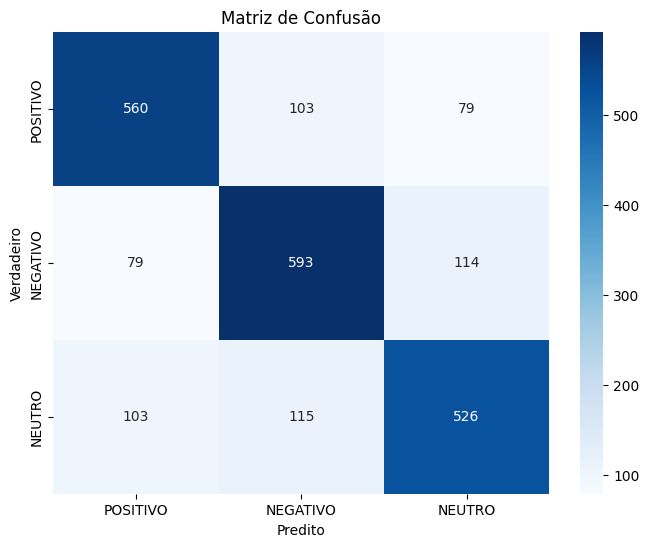

In [40]:
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### 3.4 - Salvando CSV do resultado Embedding Layer com Word2Vec

In [41]:
# df_resultEL

#Atividade 4 - Modelagem de Naive Bayes

O algoritmo “Naive Bayes” foi baseado no “Teorema de Bayes”, modelo criado pelo matemático inglê Thomas Bayes (1701 – 1761). Tal modelo realiza uma classificação probabilística de observações, desconsiderando correlações entre features, caracterizando-as em classes pré-definidas. Dessa maneira, realiza a predição de um evento A acontecer dado a ocorrência que um evento B já aconteceu. Ao contrario dos outros modelos que consideram a proximidade grafica entre dois elementos para os atribuir uma classe, o Naive Bayes se baseia inteiramente na formula do "Teorema de Bayes" para fazer as contas que irão atribuir a classe do elemento.

**Referências**

(1) O que é Naive Bayes e como funciona esse algoritmo de classificação.

https://rockcontent.com/br/blog/naive-bayes/.

(2) 1.9. Naive Bayes — scikit-learn 1.2.2 documentation.

https://scikit-learn.org/stable/modules/naive_bayes.html.


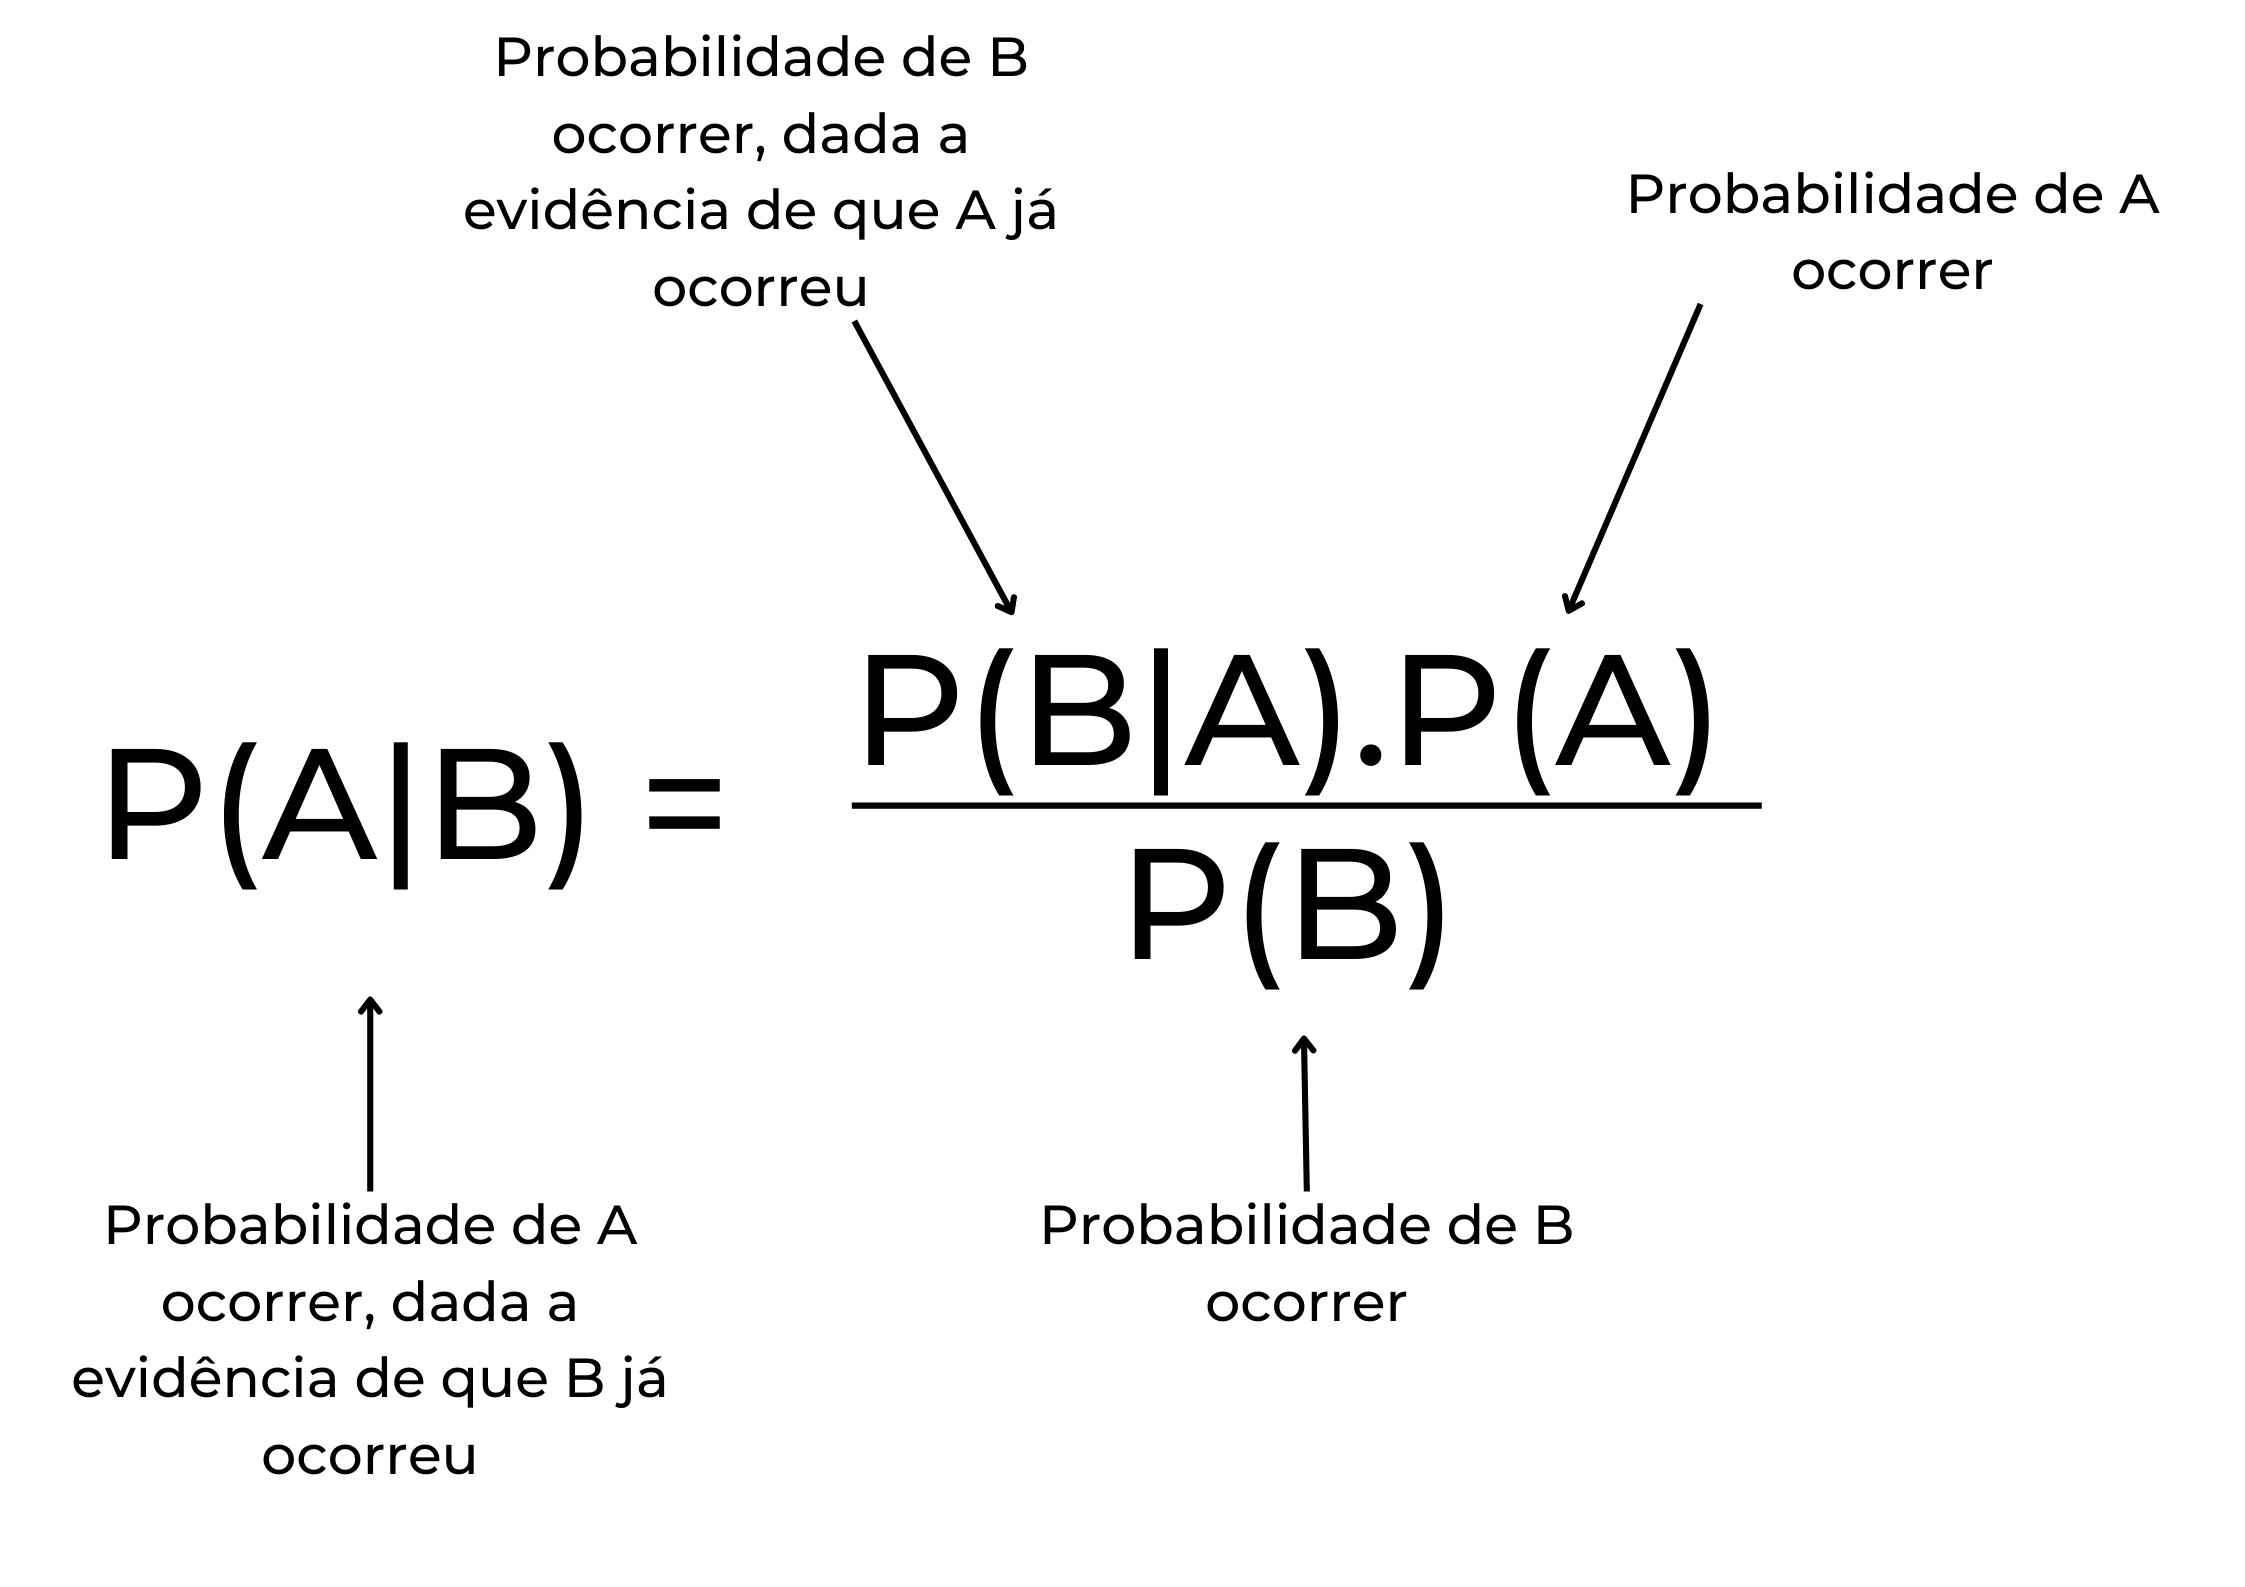

Fonte da imagem: Autoria Própria

## 4.1 - Definição da Função

In [42]:
# Função de treinamento Naive Bayes
def classification_naive_bayes(X,Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Criação de uma instância do classificador Naive Bayes Gaussiano
    gnb = GaussianNB()

    # Treinamento do classificador utilizando os dados de treinamento
    gnb.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = gnb.predict(X_test)

    # Calculo da precisão do classificador
    accuracy = accuracy_score(y_test, y_pred)

    # Retorno da acurácia, y_test, y_pred
    return accuracy, y_test, y_pred

## Naive Bayes - Duas categorias com balanceamento

### 4.2 - Teste da Função

In [43]:
'''
# Balanceamento dos dados
df_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]
df_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
Y = np.array(dfrnn_balanced['sentimento'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)
'''

"\n# Balanceamento dos dados\ndf_positive = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 0]\ndf_negative = dfW2Vmodelo[dfW2Vmodelo['sentimento'] == 1]\n\ndf_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)\n\ndfrnn_balanced = pd.concat([df_positive_resampled, df_negative])\n\n# Inverter a codificação das classes\ndfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})\n\n# Separando os dados em X e y (balanceados)\nX = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\nY = np.array(dfrnn_balanced['sentimento'])\n\n# Chamada da função com os dados balanceados\naccuracy, y_test, y_pred = classification_naive_bayes(X, Y)\n\n# Imprime a acurácia\nprint(accuracy)\n"

A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 4.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

In [44]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Naive Bayes')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()
'''

"\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Matriz de Confusão da Modelagem de Naive Bayes')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])\nplt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',\n             color='white' if custom_cm[i, j] > thresh else 'black')\n\nplt.xlabel('Previsão')\nplt.ylabel('Valor Real')\nplt.tight_layout()\nplt.show()\n"

### 4.4 - Salvando CSV do resultado da Modelagem de Naive Bayes

In [45]:
'''
# Crie um DataFrame com as previsões
df_resultNB = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
# Salve o DataFrame em um arquivo CSV
df_resultNB.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoNaiveBayes.csv', index=False)
print('Salvo com sucesso')
'''

"\n# Crie um DataFrame com as previsões\ndf_resultNB = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})\n# Salve o DataFrame em um arquivo CSV\ndf_resultNB.to_csv('/content/drive/MyDrive/PROJETO BTG/resultadoNaiveBayes.csv', index=False)\nprint('Salvo com sucesso')\n"

O Naive Bayes é um algoritmo de aprendizado supervisionado que faz uso do Teorema de Bayes para estimar a probabilidade de um exemplo pertencer a cada uma das classes disponíveis. No caso binário, onde temos duas classes (0 e 1), o modelo calcula a probabilidade de um exemplo pertencer à classe 0 e à classe 1.

## Naive Bayes - Três categorias sem balanceamento

### 4.2 - Teste da Função

In [46]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

0.5004379562043796


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 4.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

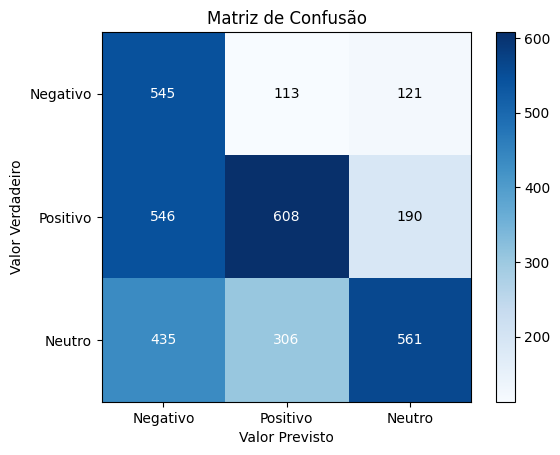

In [47]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### 4.4 - Hiperparâmetros com Random Search do Naive Bayes

In [48]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.metrics import recall_score

# Função de treinamento Naive Bayes
def classification_naive_bayes(X, Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Definindo os hiperparâmetros a serem otimizados
    param_dist = {'var_smoothing': uniform(1e-20, 1e-2)}  # Intervalo para o hiperparâmetro var_smoothing

    # Criação do classificador Naive Bayes
    clf = GaussianNB()

    # Realização da busca aleatória com validação cruzada
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = random_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Treinamento do classificador utilizando os melhores hiperparâmetros
    clf = GaussianNB(**best_params)
    clf.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = clf.predict(X_test)

    # Cálculo do recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Retorno do recall, y_test, y_pred
    return recall, y_test, y_pred

# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
recall, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime o recall
print("Recall:", recall)


Melhores hiperparâmetros: {'var_smoothing': 0.0005808361216819946}
Recall: 0.4992700729927007


###4.4.1 - Aplicando o hiperparâmetro

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler

# Balanceamento dos dados
df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

# Realizar oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Criação do classificador Naive Bayes com o melhor hiperparâmetro
clf = GaussianNB(var_smoothing=0.0005808361216819946)

# Treinamento do classificador
clf.fit(X_train, y_train)

# Previsões nos dados de teste
y_pred = clf.predict(X_test)

# Cálculo do recall
recall = recall_score(y_test, y_pred, average='macro')

NBRecall = recall

# Imprimir o resultado do recall
print("Recall:", NBRecall)


Recall: 0.5358134240535136


### 4.5 - Salvando CSV do resultado do Modelo Naive Bayes

In [50]:
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsNaiveBayes.csv', index=False)
print("Salvo com sucesso")

Salvo com sucesso


### 4.6 - Exportar o Modelo Naive Bayes com pickle

In [51]:
# Salvar o modelo Naive Bayes em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_naive_bayes.pkl', 'wb') as arquivo:
    pickle.dump(clf, arquivo)

## Naive Bayes - Três categorias com balanceamento

### 4.2 - Teste da Função

In [52]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

Melhores hiperparâmetros: {'var_smoothing': 0.0005808361216819946}
0.5299295774647887


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

### 4.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

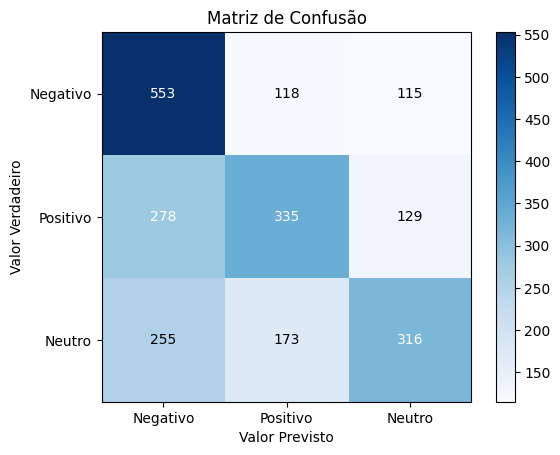

In [53]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

# Atividade 5 - Modelo SVM (Support Vector Machine)

A definição do Support Vector Machine(SVM), pode ser dada por, um modelo que visa encontrar o hiperplano de separação ideal para os dados propostos, sendo o seu maior objetivo a maximização das distâncias das variáveis deixando-as o mais definida possível. Este tende a ser mais complexo que o KNN e apresentar resultados mais estruturados. Nesse algorítmo, é escolhida a reta - denominada de "hiperplano" em maiores dimensões - que mais se distancia entre dois grupos de dados. Ao formular essa reta, o programa consegue predizer a qual classe pertence os dados depois de checar de qual lado da reta esse valor está.

**Referências**

(1) Introduction to Support Vector Machines (SVM) - GeeksforGeeks.

https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/.


(2) 1.4. Support Vector Machines — scikit-learn 1.2.2 documentation.

https://scikit-learn.org/stable/modules/svm.html.


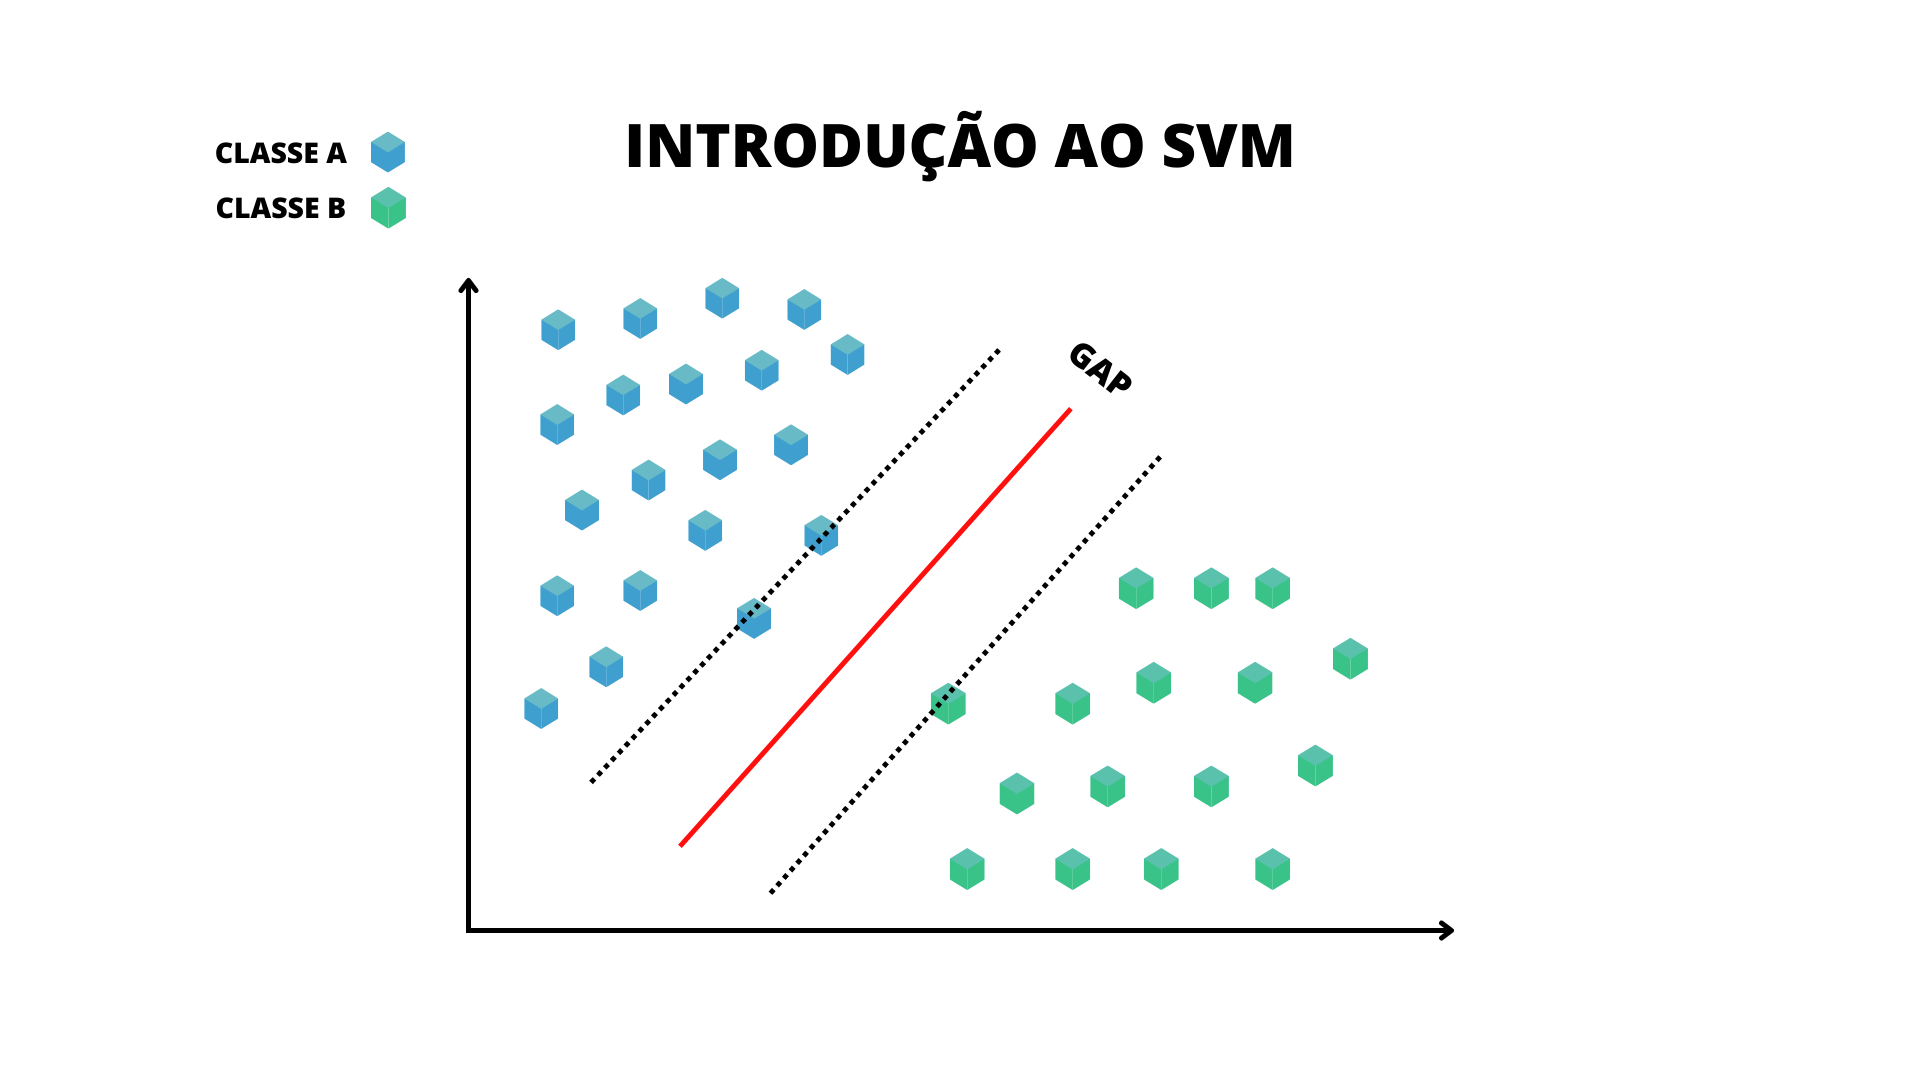

Fonte da imagem: Autoria Própria

In [54]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## 5.1 - Definição da Função

In [55]:
def classification_svm(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo SVM
  modelo_svm = SVC()
  modelo_svm.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_svm.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_svm, y_test, y_pred

## SVM - Duas categorias com balanceamento

### 5.2 - Definição da Função

In [56]:
'''
from sklearn.svm import SVC

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

# Dividir o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVM
modelo_svm = SVC()
modelo_svm.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_svm.predict(x_test)
'''

"\nfrom sklearn.svm import SVC\n\n# Definir os arrays x e y\nx = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\ny = np.array(dfrnn_balanced['sentimento'])\n\n# Dividir o conjunto de dados em treinamento e teste\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o modelo SVM\nmodelo_svm = SVC()\nmodelo_svm.fit(x_train, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = modelo_svm.predict(x_test)\n"

### 5.3 - Teste da Função

In [57]:
'''
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o F-score
fscore = f1_score(y_test, y_pred)
print("F-score:", fscore)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Realizar validação cruzada
scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
print("Acurácia da Validação Cruzada:", np.mean(scores))
'''

'\n# Calcular a acurácia\nacuracia = accuracy_score(y_test, y_pred)\nprint("Acurácia:", acuracia)\n\n# Calcular o F-score\nfscore = f1_score(y_test, y_pred)\nprint("F-score:", fscore)\n\n# Calcular o recall\nrecall = recall_score(y_test, y_pred)\nprint("Recall:", recall)\n\n# Realizar validação cruzada\nscores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)\nprint("Acurácia da Validação Cruzada:", np.mean(scores))\n'

### 5.4 - Matriz de confusão

In [58]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de SVM')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)
'''

'\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\nplt.title(\'Matriz de Confusão da Modelagem de SVM\')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\nplt.yticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], \'d\'), ha=\'center\', va=\'center\',\n             color=\'white\' if custom_cm[i, j] > thresh else \'black\')\n\nplt.xlabel(\'Previsão\')\nplt.ylabel(\'Valor Real\')\nplt.tight_layout()\nplt.sho

## SVM - Três categorias sem balanceamento

### 5.2 - Teste da Função

In [59]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_svm(x, y)

Acurácia: 0.6037956204379562
F-score: 0.585549218791849
Recall: 0.5797738449355753
Acurácia da Validação Cruzada: 0.6140166447656592


### 5.3 - Matriz de confusão

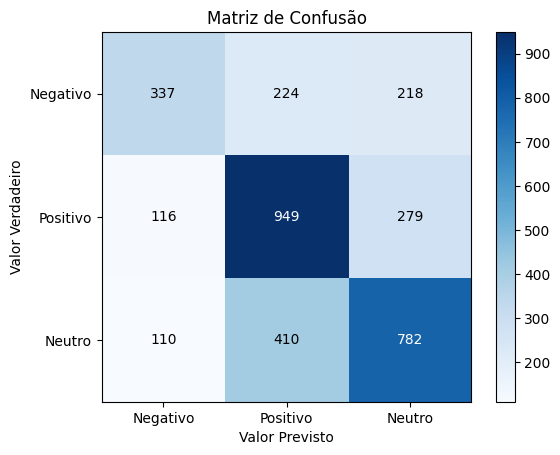

In [60]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
    df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
    df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir os resultados
    print("Recall:", recall)
    print("Acurácia:", accuracy)

    return modelo_svm, y_test, y_pred


In [62]:
print("Melhores hiperparâmetros:", best_params)


Melhores hiperparâmetros: {'batch_size': 126, 'learning_rate': 0.01, 'num_epochs': 10, 'num_hidden_units': 111}


###5.4 - Aplicando os Melhores Hiperparâmetros

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
    df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
    df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    SVMRecall = recall

    # Imprimir o resultado do recall
    print("Recall: ", SVMRecall)

    return modelo_svm, y_test, y_pred, SVMRecall

# Chamar a função com os dados balanceados
modelo_svm, y_test, y_pred, SVMRecall  = classification_svm(X, Y)


Melhores hiperparâmetros: {'C': 100}
Melhor valor de C: 100
Recall:  0.653251424683431


### Salvando CSV do resultado do Modelo SVM

In [64]:
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsSVM.csv', index=False)
print("Salvo com sucesso")

Salvo com sucesso


### Exportar o Modelo SVM com pickle

In [65]:
# Salvar o modelo SVM em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_svm.pkl', 'wb') as arquivo:
    pickle.dump(modelo_svm, arquivo)

## SVM - Três categorias com balanceamento

### 5.2 - Teste da Função

In [66]:
# # Balanceamento dos dados
# df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
# df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
# df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

# df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
# df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

# dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# # Definir os arrays x e y
# x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
# y = np.array(dfrnn_balanced['sentimento2'])

# model, y_test, y_pred = classification_svm(x, y)

### 5.3 - Matriz de confusão

In [67]:
# # Cálculo da matriz de confusão
# cm = confusion_matrix(y_test, y_pred)

# # Plot da matriz de confusão
# fig, ax = plt.subplots()
# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# ax.figure.colorbar(im, ax=ax)

# # Configurações do gráfico
# classes = ['Negativo', 'Positivo', 'Neutro']
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes,
#        yticklabels=classes,
#        title='Matriz de Confusão',
#        ylabel='Valor Verdadeiro',
#        xlabel='Valor Previsto')

# # Adiciona os valores nas células da matriz
# thresh = cm.max() / 2.
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         ax.text(j, i, format(cm[i, j], 'd'),
#                 ha="center", va="center",
#                 color="white" if cm[i, j] > thresh else "black")

# # Mostra o gráfico
# plt.show()

# Atividade 6 - Modelo Random Forest

Random Forest é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para realizar tarefas de classificação ou regressão. Ele usa aleatoriedade para criar árvores independentes e evitar overfitting, melhorando a precisão e a generalização do modelo. As previsões de cada árvore são combinadas por votação majoritária (classificação) ou média (regressão). O Random Forest é robusto, lida bem com conjuntos de dados grandes e complexos e fornece uma medida de importância das características.

**Referências**

(1) Entenda como funciona o Random Forest (Machine Learning).

https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/.


(2) What is Random Forest? | IBM.

 https://www.ibm.com/topics/random-forest.

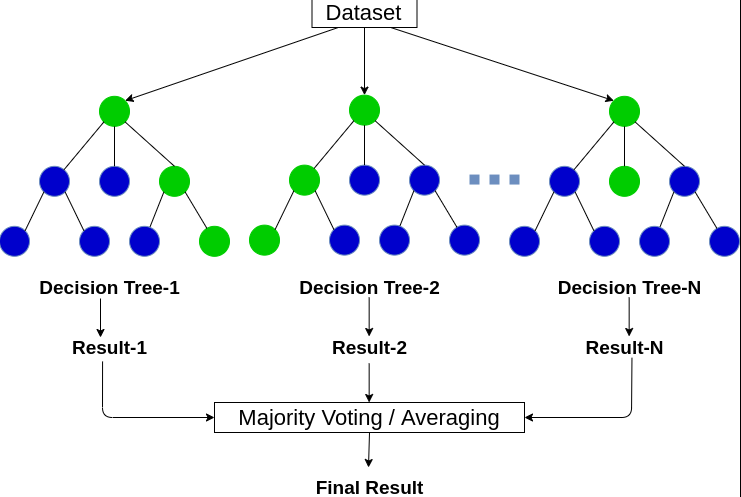

Fonte Imagem: Google Images - Analytics Vidhya

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np

## 6.1 - Definição da função

In [69]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

## Random Florest - Duas categorias com balanceamento

### 6.2 - Definição da função

In [70]:
'''
# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

# Dividir o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_rf.predict(x_test)
'''

"\n# Definir os arrays x e y\nx = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))\ny = np.array(dfrnn_balanced['sentimento'])\n\n# Dividir o conjunto de dados em treinamento e teste\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o modelo Random Forest\nmodelo_rf = RandomForestClassifier()\nmodelo_rf.fit(x_train, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = modelo_rf.predict(x_test)\n"

### 6.3 - Teste da função

In [71]:
'''
# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o F-score
fscore = f1_score(y_test, y_pred)
print("F-score:", fscore)

# Calcular o recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Realizar validação cruzada
scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
print("Acurácia da Validação Cruzada:", np.mean(scores))
'''

'\n# Calcular a acurácia\nacuracia = accuracy_score(y_test, y_pred)\nprint("Acurácia:", acuracia)\n\n# Calcular o F-score\nfscore = f1_score(y_test, y_pred)\nprint("F-score:", fscore)\n\n# Calcular o recall\nrecall = recall_score(y_test, y_pred)\nprint("Recall:", recall)\n\n# Realizar validação cruzada\nscores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)\nprint("Acurácia da Validação Cruzada:", np.mean(scores))\n'

###6.4 - Matriz de confusão

In [72]:
'''
# Cálculo da matriz de confusão
VP = confusion_matrix(y_test, y_pred)[0, 0]
FN = confusion_matrix(y_test, y_pred)[0, 1]
FP = confusion_matrix(y_test, y_pred)[1, 0]
VN = confusion_matrix(y_test, y_pred)[1, 1]

# Criação da matriz de confusão personalizada
custom_cm = np.array([[VP, FN], [FP, VN]])

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Random Florest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['POSITIVO', 'NEGATIVO'])
plt.yticks(tick_marks, ['POSITIVO', 'NEGATIVO'])

# Adição dos valores numéricos na matriz
thresh = custom_cm.max() / 2.
for i, j in np.ndindex(custom_cm.shape):
    plt.text(j, i, format(custom_cm[i, j], 'd'), ha='center', va='center',
             color='white' if custom_cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)
'''

'\n# Cálculo da matriz de confusão\nVP = confusion_matrix(y_test, y_pred)[0, 0]\nFN = confusion_matrix(y_test, y_pred)[0, 1]\nFP = confusion_matrix(y_test, y_pred)[1, 0]\nVN = confusion_matrix(y_test, y_pred)[1, 1]\n\n# Criação da matriz de confusão personalizada\ncustom_cm = np.array([[VP, FN], [FP, VN]])\n\n# Plot da matriz de confusão\nplt.figure(figsize=(8, 6))\nplt.imshow(custom_cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\nplt.title(\'Matriz de Confusão da Modelagem de Random Florest\')\nplt.colorbar()\ntick_marks = np.arange(2)\nplt.xticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\nplt.yticks(tick_marks, [\'POSITIVO\', \'NEGATIVO\'])\n\n# Adição dos valores numéricos na matriz\nthresh = custom_cm.max() / 2.\nfor i, j in np.ndindex(custom_cm.shape):\n    plt.text(j, i, format(custom_cm[i, j], \'d\'), ha=\'center\', va=\'center\',\n             color=\'white\' if custom_cm[i, j] > thresh else \'black\')\n\nplt.xlabel(\'Previsão\')\nplt.ylabel(\'Valor Real\')\nplt.tight_layout

## Random Florest - Três categorias sem balanceamento

### 6.1 - Teste da função

In [73]:
# Balanceamento dos dados
df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_random_forest(x, y)

RFRecall = recall_score(y_test, y_pred, average='weighted')


Acurácia: 0.6583941605839416
F-score: 0.6447222125917238
Recall: 0.6410756270429548
Acurácia da Validação Cruzada: 0.6399474375821287


### 6.2 - Matriz de confusão

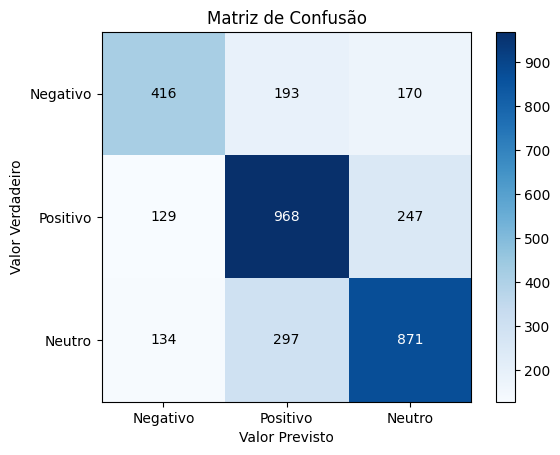

In [74]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### Salvando CSV do resultado do Modelo Random Forest

In [75]:
# Criar DataFrame com as previsões
df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('predictionsRandomForest.csv', index=False)
print("Salvo com sucesso")

Salvo com sucesso


### Exportar Modelo Random Forest com pickle

In [76]:
# Salvar o modelo Random Forest em um arquivo PKL
with open('/content/drive/MyDrive/PROJETO BTG/modelo_random_forest.pkl', 'wb') as arquivo:
    pickle.dump(model, arquivo)

## Random Florest - Três categorias com balanceamento

### 6.1 - Teste da função

In [77]:
# # Balanceamento dos dados
# df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
# df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
# df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

# df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)
# df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negative), random_state=42)

# dfrnn_balanced = pd.concat([df_negative, df_positive_resampled, df_neutral_resampled])

# # Separando os dados em X e y (balanceados)
# x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2'], axis=1))
# y = np.array(dfrnn_balanced['sentimento2'])

# model, y_test, y_pred = classification_random_forest(x, y)

### 6.2 - Matriz de confusão

In [78]:
# # Cálculo da matriz de confusão
# cm = confusion_matrix(y_test, y_pred)

# # Plot da matriz de confusão
# fig, ax = plt.subplots()
# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# ax.figure.colorbar(im, ax=ax)

# # Configurações do gráfico
# classes = ['Negativo', 'Positivo', 'Neutro']
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes,
#        yticklabels=classes,
#        title='Matriz de Confusão',
#        ylabel='Valor Verdadeiro',
#        xlabel='Valor Previsto')

# # Adiciona os valores nas células da matriz
# thresh = cm.max() / 2.
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         ax.text(j, i, format(cm[i, j], 'd'),
#                 ha="center", va="center",
#                 color="white" if cm[i, j] > thresh else "black")

# # Mostra o gráfico
# plt.show()

# Atividade 7 - Vetorização TF-IDF (Regressão Logística)

**Vetorização TFID**

A vetorização TF-IDF é uma técnica de processamento de linguagem natural que representa textos como vetores numéricos. Ela calcula a importância de cada palavra em um documento com base em sua frequência no documento e em sua raridade no conjunto de documentos. Essa abordagem permite quantificar a relevância das palavras e é útil em tarefas como classificação de textos e recuperação de informações. A vetorização TF-IDF facilita o trabalho de algoritmos de aprendizado de máquina ao transformar os textos em representações numéricas.

**Referências**

Text Vectorization Using Python: TF-IDF - Okan Bulut.

https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/.


Scikit Learn TfidfVectorizer.

https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score.

**Regressão Logística**

A regressão logística é um algoritmo de aprendizado de máquina usado para classificação binária. Ele estima a probabilidade de um objeto pertencer a uma classe usando uma função sigmoide. Durante o treinamento, os pesos das variáveis são ajustados para minimizar a diferença entre as probabilidades estimadas e as classes reais. O modelo treinado pode ser usado para fazer previsões em novos objetos, definindo um limiar para determinar a classe final. A regressão logística é uma técnica simples, eficiente e interpretável usada em várias áreas.


**Referências**

(1) Regressão Logística: Conceitos Essenciais e Modelo.

https://estatsite.com.br/2018/08/29/regressao-logistica-conceitos-e-formula/.

(2) O que é regressão logística? | IBM.

https://www.ibm.com/br-pt/topics/logistic-regression.


## Regressão Logística - Três categorias sem balanceamento

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### 7.1 - Definição da função

In [80]:
def classification_logistic_regression(X_combined, y):
  X_combined_train, X_combined_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

  # Criar o vetor TF-IDF
  vectorizer = TfidfVectorizer()
  X_combined_train_tfidf = vectorizer.fit_transform(X_combined_train)
  X_combined_test_tfidf = vectorizer.transform(X_combined_test)

  # Treinar um modelo (Regressão Logística com os hiperparâmetros definidos)
  model = LogisticRegression(solver='liblinear', penalty='l2', C=10)
  model.fit(X_combined_train_tfidf, y_train)

  # Fazer previsões e avaliar o modelo
  y_pred = model.predict(X_combined_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  print("Acurácia do modelo:", accuracy)
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Revocação do modelo:", recall)

  # Calcular o F1-score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("F1-score do modelo:", f1)

  return model, y_test, y_pred

###7.2 - Teste da Função

In [81]:
# df_negativo = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 0]
# df_positive = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 1]
# df_neutral = dfW2Vmodelo2[dfW2Vmodelo2['sentimento2'] == 2]

# dfrnn_balanced = pd.concat([df_negativo, df_positive, df_neutral])

# textFinal = base_tratada['texto_processado'].iloc[:12343]
# textFinal2 = textFinal.astype(str).values

# tipoInteracaoFinal = base_tratada['tipoInteracao'].iloc[:12343]
# tipoInteracaoFinal2 = tipoInteracaoFinal.astype(str).values

# # Dividir os dados em conjunto de treinamento e teste
# X_text = textFinal2
# X_type = tipoInteracaoFinal2
# X_combined = [text + ' ' + type for text, type in zip(X_text, X_type)]

# selected_data = dfrnn_balanced['sentimento2'].iloc[:12343]
# # y = base_tratada['sentimento2'].astype(str).values
# y = np.array(selected_data)

# model, y_test, y_pred = classification_logistic_regression(X_combined, y)

# RLRecall = recall_score(y_test, y_pred, average='weighted')

# print("Recall: ",RLRecall)

### 7.3 - Matriz de Confusão

In [82]:
# # Calcular a matriz de confusão
# confusion = confusion_matrix(y_test, y_pred)

# # Criar um DataFrame para exibir a matriz de confusão
# confusion_df = pd.DataFrame(confusion, index=['NEGATIVO', 'POSITIVO', 'NEUTRO'], columns=['NEGATIVO', 'POSITIVO', 'NEUTRO'])

# # Plotar a matriz de confusão
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
# plt.title("Matriz de Confusão")
# plt.xlabel("Valores Previstos")
# plt.ylabel("Valores Reais")
# plt.show()

### Salvando CSV do resultado da Regressão Logística

In [83]:
# # Criar DataFrame com as previsões
# df_predictions = pd.DataFrame({'Sentimento Real': y_test, 'Sentimento Previsto': y_pred})

# # Salvar o DataFrame em um arquivo CSV
# df_predictions.to_csv('predictionsLogisticRegression.csv', index=False)
# print("Salvo com sucesso")

### Exportar Modelo de Regressão Logística com pickle

In [84]:
# # Salvar o modelo RNN em um arquivo PKL
# with open('/content/drive/MyDrive/PROJETO BTG/modelo_logistic_regression.pkl', 'wb') as arquivo:
#     pickle.dump(model, arquivo)

# Atividade 8 - Aplicação de novas features.

No projeto foram utilizadas as seguintes features: "sentimento" e "frase". Porém neste momento são aplicados novas features ao projeto para testa-lás, sendo elas as colunas "comentário", "marcação" e "resposta", todas elas são provenientes da coluna "tipoInteração" que após a aplicação do método one hot encoding formou as 3 novas features.


## 8.1.Base tratada + one hot encodign na coluna tipoInteração
Abaixo será feito o One hot encoding da coluna "tipoInteração". Nela existem as seguintes classes: comentário, marcação e resposta, após o uso do one hot encoding cada classe será transformada em uma nova coluna.
O método one-hot é uma técnica para representar variáveis categóricas como vetores binários, onde 1 representa a presença da categoria e 0 representa a ausência. A biblioteca pandas em Python oferece a função get_dummies() para realizar essa codificação.


### 8.1.1.Teste isolado

In [85]:
# Criando um dataframe para o teste
teste_onehot = pd.DataFrame({'tipoInteracao': ['comentário', 'marcação', 'resposta', 'marcação', 'comentário']})
#definindo a função
def teste_one_hot_encoding(df, column):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df
# Aplicação da função
novas_colunas = teste_one_hot_encoding(teste_onehot, 'tipoInteracao')

# Imprimir o dataframe original
print("Dataframe Original:")
print(teste_onehot)

# Imprimir o dataframe codificado com one-hot encoding
print("one hot encoding:")
print(novas_colunas)

Dataframe Original:
  tipoInteracao
0    comentário
1      marcação
2      resposta
3      marcação
4    comentário
one hot encoding:
   comentário  marcação  resposta
0           1         0         0
1           0         1         0
2           0         0         1
3           0         1         0
4           1         0         0


### 8.1.2.Teste da função

In [86]:
def one_hot_encoding(df, column):
    one_hot = pd.get_dummies(df[column])
    df = df.drop(column, axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df


### 8.1.3.Aplicação da função

In [87]:
dados = pd.read_csv('/content/drive/MyDrive/PROJETO BTG/dadosTratados.csv')

In [88]:
one_hot_dados = one_hot_encoding(dados, 'tipoInteracao')
print(one_hot_dados)

                  autor                                              texto  \
0            v8_capital  Confira os resultados dos nossos fundos no mês...   
1         winthegame_of  A Alvarez & Marsal estará conosco no Sportainm...   
2            marta_bego  #Repost btgpactual with make_repost ・・・ Entend...   
3            lmviapiana                               Minuto touro de ouro   
4          vanilson_dos                                   @ricktolledo Sim   
...                 ...                                                ...   
12350       onixcapital  Uma noite de encontros e muito conhecimento on...   
12351  amgcapitalinvest  Erros financeiros para eliminar antes dos 30 a...   
12352     jayipacderota  Estou muito grato por todo o esforço que você ...   
12353   moinho_cultural  "👉GUADAKAN está chegando!!!!  A aula pública e...   
12354         bfmarilia  @btgpactual pq o morning call não está mais ap...   

      sentimento  comentário  marcação  resposta  
0        NEU

### 8.1.4.Criando dataframe com one hot encoding + Word2Vec

In [89]:
# Criando o novo dataframe com as mesmas colunas do dfW2V
dfoneHot = pd.DataFrame(dfW2Vmodelo2)

dfoneHot['resposta'] = one_hot_dados['resposta']
dfoneHot['comentário'] = one_hot_dados['comentário']
dfoneHot['marcação'] = one_hot_dados['marcação']

# Especificando o diretório de destino para salvar o arquivo CSV
diretorio_destino = '/content/drive/MyDrive/PROJETO BTG/'

# Salvando o novo dataframe em um arquivo CSV no diretório especificado
caminho_arquivo_csv = diretorio_destino + 'oneHot.csv'
dfoneHot.to_csv(caminho_arquivo_csv, index=False)

print("Arquivo 'oneHot.csv' salvo com sucesso em:", caminho_arquivo_csv)

Arquivo 'oneHot.csv' salvo com sucesso em: /content/drive/MyDrive/PROJETO BTG/oneHot.csv


In [90]:
dfoneHot

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento2,resposta,comentário,marcação
0,"['Confira', 'resultados', 'fundos', 'mes', 'fe...",-0.461673,0.625237,0.114453,0.459222,0.306794,-0.586930,0.213955,0.866080,-0.162611,...,0.328353,0.068527,-0.489172,0.047712,0.096991,0.001627,2,0,0,1
1,"['Alvarez', 'Marsal', 'estara', 'conosco', 'Sp...",-0.391035,1.143772,0.040439,0.572504,0.637657,-0.724342,0.410926,1.422693,-0.067073,...,0.683105,-0.003922,-1.008320,-0.058452,-0.029896,0.249026,2,0,0,1
2,"['Repost', 'btgpactual', 'with', 'make_repost'...",-0.230138,0.629646,0.091119,0.404625,0.322938,-0.452704,0.183015,0.794990,-0.280394,...,0.585429,-0.035896,-0.602881,-0.035103,0.082608,0.141593,2,0,0,1
3,"['Minuto', 'touro', 'ouro']",-0.075631,0.185909,0.038363,0.081205,0.048204,-0.109816,0.020094,0.213841,-0.036723,...,0.116384,0.046445,-0.126920,0.004547,-0.002272,0.051925,1,0,1,0
4,"['ricktolledo', 'Sim']",-0.081614,0.200918,0.037080,0.084774,0.045994,-0.137323,0.053739,0.255260,-0.032161,...,0.118346,0.052154,-0.128393,0.014528,0.014272,0.039189,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11410,"['noite', 'encontros', 'conhecimento', 'onde',...",-0.423013,0.845564,0.207318,0.155583,0.332432,-0.672942,0.332869,1.306000,-0.062801,...,0.632222,0.012129,-0.734997,0.144942,-0.112458,0.058215,2,0,0,1
11411,"['Erros', 'financeiros', 'eliminar', 'antes', ...",-0.743068,1.936539,0.307477,0.878058,0.368304,-1.239160,0.074150,1.989323,-0.586596,...,1.063905,0.544783,-1.058241,-0.048385,0.070893,0.485264,2,0,0,1
11412,"['grato', 'todo', 'esforco', 'voce', 'rendeu',...",-0.318595,1.280301,0.189564,0.505960,0.160230,-0.578292,0.599425,1.486780,-0.164608,...,0.703512,0.374952,-0.876997,0.115464,0.033402,0.244219,1,0,0,1
11413,"['GUADAKAN', 'chegando', 'aula', 'publica', 'f...",-0.245366,0.609202,0.120352,0.205266,0.196098,-0.370560,0.149205,0.772488,-0.077014,...,0.395657,0.099649,-0.464842,0.046825,-0.026497,0.142462,2,0,0,1


## 8.2.Aplicação das novas features nos modelos

### 8.2.1 RNN - Três categorias e sem balanceamento

#### 8.2.2 - Teste da Função

In [91]:
def classification_rnn(X_test, y_test):
  # Divisão em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

  # Remodelar os dados de entrada
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

  # Definindo o modelo
  model = Sequential()
  model.add(LSTM(units=128, input_shape=(1, X_test.shape[2])))
  model.add(Dense(units=3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Treinar o modelo
  model.fit(X_test, y_test, epochs=10, batch_size=32)

  # Avaliar a precisão do modelo
  _, accuracy = model.evaluate(X_test, y_test)
  print('Acurácia: %.2f%%' % (accuracy * 100))

  # Fazer previsões no conjunto de teste
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print('Recall: %.2f%%' % (recall* 100))

  return model, y_test, y_pred

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS**

In [92]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import recall_score

In [93]:
# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_positive, df_negative, df_neutral])

# Separando os dados de teste em X_test e y_test (balanceados)
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_rnn(X_test, y_test)

Epoch 1/10
108/108 [==============================] - 3s 4ms/step - loss: 0.9976 - accuracy: 0.5104
Epoch 2/10
108/108 [==============================] - 0s 4ms/step - loss: 0.9335 - accuracy: 0.5717
Epoch 3/10
108/108 [==============================] - 0s 4ms/step - loss: 0.9162 - accuracy: 0.5845
Epoch 4/10
108/108 [==============================] - 0s 4ms/step - loss: 0.9000 - accuracy: 0.5915
Epoch 5/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8949 - accuracy: 0.5883
Epoch 6/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8870 - accuracy: 0.5997
Epoch 7/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8789 - accuracy: 0.6053
Epoch 8/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8812 - accuracy: 0.5968
Epoch 9/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8721 - accuracy: 0.6044
Epoch 10/10
108/108 [==============================] - 1s 3ms/step - loss: 0.8625 - accuracy: 0.6120

#### 8.2.3 - Visualização da Matriz de Confusão de Redes Neurais Recorrentes (RNN)

**USANDO TRÊS CATEGORIAS SEM BALANCEAMENTO DE DADOS - MATRIZ DE CONFUSÃO**

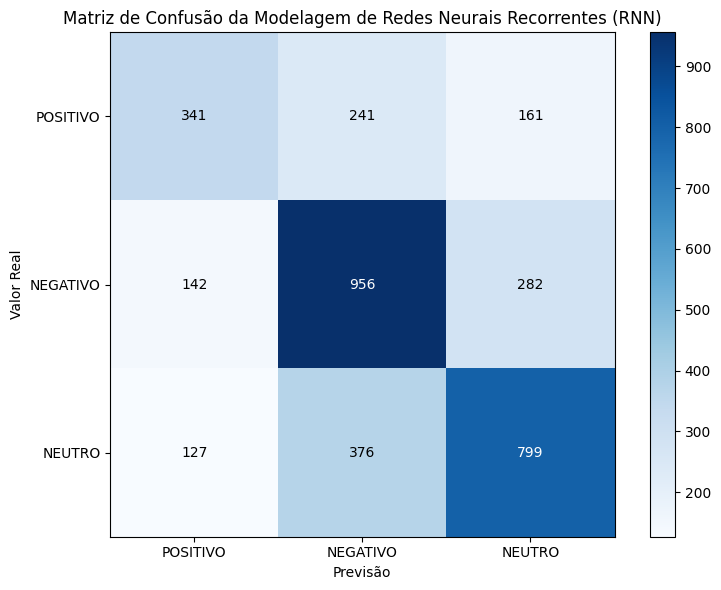

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Previsões no conjunto de teste
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definição dos rótulos das classes
class_labels = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão da Modelagem de Redes Neurais Recorrentes (RNN)')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Adição dos valores numéricos na matriz
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

#### 8.2.4 - Hiperparâmetros com Random Search do RNN

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_data = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y_labels = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_data, Y_labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_data = (X_data - X_train_mean) / X_train_std

# Função para criar o modelo RNN
def create_model(num_epochs, batch_size, learning_rate, num_hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=num_hidden_units, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
              validation_data=(X_val, y_val))

    y_pred = model.predict(X_data)
    y_pred = np.round(y_pred).flatten()

    recall = recall_score(Y_labels, y_pred, average='macro')
    print('Recall:', recall)

    return model

# Definir a distribuição de valores para cada hiperparâmetro
param_dist = {
    'num_epochs': sp_randint(10, 31),  # Intervalo entre 10 e 30
    'batch_size': sp_randint(32, 129),  # Intervalo entre 32 e 128
    'learning_rate': [0.001, 0.01, 0.1],  # Valores fixos
    'num_hidden_units': sp_randint(64, 257)  # Intervalo entre 64 e 256
}

# Criação do KerasClassifier com a função create_model
keras_classifier = KerasClassifier(build_fn=create_model)

# Realizar a busca aleatória
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall_macro', refit=False, error_score='raise')

random_result = random_search.fit(X_data, Y_labels)

# Obter os resultados da busca aleatória
results = random_result.cv_results_
best_params_idx = results['rank_test_score'].argmin()
best_params = results['params'][best_params_idx]
best_recall = results['mean_test_score'][best_params_idx]

print('Melhores hiperparâmetros:', best_params)
print('Melhor Recall:', best_recall)


Epoch 1/13


<ipython-input-95-0d6bff0f50cd>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model)


68/68 [==============================] - 1s 7ms/step - loss: -1.3786 - binary_accuracy: 0.4002 - val_loss: -3.1461 - val_binary_accuracy: 0.4130
Epoch 2/13
68/68 [==============================] - 0s 4ms/step - loss: -6.2663 - binary_accuracy: 0.4069 - val_loss: -9.6647 - val_binary_accuracy: 0.4136
Epoch 3/13
68/68 [==============================] - 0s 4ms/step - loss: -15.7143 - binary_accuracy: 0.4102 - val_loss: -21.1790 - val_binary_accuracy: 0.4193
Epoch 4/13
68/68 [==============================] - 0s 5ms/step - loss: -31.1191 - binary_accuracy: 0.4124 - val_loss: -38.4209 - val_binary_accuracy: 0.4243
Epoch 5/13
68/68 [==============================] - 0s 6ms/step - loss: -52.7176 - binary_accuracy: 0.4129 - val_loss: -61.5648 - val_binary_accuracy: 0.4255
Epoch 6/13
68/68 [==============================] - 0s 6ms/step - loss: -80.5921 - binary_accuracy: 0.4147 - val_loss: -90.3494 - val_binary_accuracy: 0.4237
Epoch 7/13
68/68 [==============================] - 0s 7ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


68/68 [==============================] - 1s 6ms/step - loss: -1.1032 - binary_accuracy: 0.3853 - val_loss: -2.7213 - val_binary_accuracy: 0.4080
Epoch 2/13
68/68 [==============================] - 0s 4ms/step - loss: -5.6355 - binary_accuracy: 0.4061 - val_loss: -8.6420 - val_binary_accuracy: 0.4111
Epoch 3/13
68/68 [==============================] - 0s 4ms/step - loss: -14.4741 - binary_accuracy: 0.4071 - val_loss: -19.1780 - val_binary_accuracy: 0.4143
Epoch 4/13
68/68 [==============================] - 0s 4ms/step - loss: -28.7825 - binary_accuracy: 0.4105 - val_loss: -35.1104 - val_binary_accuracy: 0.4199
Epoch 5/13
68/68 [==============================] - 0s 5ms/step - loss: -48.8939 - binary_accuracy: 0.4141 - val_loss: -56.2941 - val_binary_accuracy: 0.4186
Epoch 6/13
68/68 [==============================] - 0s 4ms/step - loss: -74.6035 - binary_accuracy: 0.4133 - val_loss: -82.3318 - val_binary_accuracy: 0.4212
Epoch 7/13
68/68 [==============================] - 0s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92/92 [==============================] - 1s 5ms/step - loss: -2.1135 - binary_accuracy: 0.3966 - val_loss: -5.2540 - val_binary_accuracy: 0.4130
Epoch 2/29
92/92 [==============================] - 0s 4ms/step - loss: -12.0708 - binary_accuracy: 0.4096 - val_loss: -19.7432 - val_binary_accuracy: 0.4174
Epoch 3/29
92/92 [==============================] - 0s 4ms/step - loss: -33.4661 - binary_accuracy: 0.4108 - val_loss: -45.5846 - val_binary_accuracy: 0.4174
Epoch 4/29
92/92 [==============================] - 0s 4ms/step - loss: -66.7535 - binary_accuracy: 0.4115 - val_loss: -82.6909 - val_binary_accuracy: 0.4224
Epoch 5/29
92/92 [==============================] - 0s 4ms/step - loss: -112.8504 - binary_accuracy: 0.4143 - val_loss: -131.4079 - val_binary_accuracy: 0.4237
Epoch 6/29
92/92 [==============================] - 0s 4ms/step - loss: -170.7690 - binary_accuracy: 0.4147 - val_loss: -191.5514 - val_binary_accuracy: 0.4255
Epoch 7/29
92/92 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


92/92 [==============================] - 2s 8ms/step - loss: -2.6554 - binary_accuracy: 0.3982 - val_loss: -6.2784 - val_binary_accuracy: 0.4124
Epoch 2/29
92/92 [==============================] - 1s 6ms/step - loss: -13.4749 - binary_accuracy: 0.4099 - val_loss: -22.0416 - val_binary_accuracy: 0.4174
Epoch 3/29
92/92 [==============================] - 0s 4ms/step - loss: -36.7091 - binary_accuracy: 0.4118 - val_loss: -50.4817 - val_binary_accuracy: 0.4180
Epoch 4/29
92/92 [==============================] - 0s 4ms/step - loss: -73.2796 - binary_accuracy: 0.4144 - val_loss: -91.4975 - val_binary_accuracy: 0.4224
Epoch 5/29
92/92 [==============================] - 0s 4ms/step - loss: -123.2290 - binary_accuracy: 0.4151 - val_loss: -144.6850 - val_binary_accuracy: 0.4230
Epoch 6/29
92/92 [==============================] - 0s 4ms/step - loss: -186.3143 - binary_accuracy: 0.4152 - val_loss: -210.7959 - val_binary_accuracy: 0.4212
Epoch 7/29
92/92 [==============================] - 0s 4ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


53/53 [==============================] - 1s 7ms/step - loss: -41.3569 - binary_accuracy: 0.4022 - val_loss: -132.9673 - val_binary_accuracy: 0.4199
Epoch 2/14
53/53 [==============================] - 0s 5ms/step - loss: -379.4007 - binary_accuracy: 0.4136 - val_loss: -668.0383 - val_binary_accuracy: 0.4230
Epoch 3/14
53/53 [==============================] - 0s 4ms/step - loss: -1228.7034 - binary_accuracy: 0.4102 - val_loss: -1723.7557 - val_binary_accuracy: 0.4255
Epoch 4/14
53/53 [==============================] - 0s 5ms/step - loss: -2647.8975 - binary_accuracy: 0.4129 - val_loss: -3292.2620 - val_binary_accuracy: 0.4224
Epoch 5/14
53/53 [==============================] - 0s 5ms/step - loss: -4674.2593 - binary_accuracy: 0.4143 - val_loss: -5430.3184 - val_binary_accuracy: 0.4199
Epoch 6/14
53/53 [==============================] - 0s 4ms/step - loss: -7357.1860 - binary_accuracy: 0.4138 - val_loss: -8161.7227 - val_binary_accuracy: 0.4136
Epoch 7/14
53/53 [==========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


53/53 [==============================] - 2s 7ms/step - loss: -38.2925 - binary_accuracy: 0.3950 - val_loss: -125.9946 - val_binary_accuracy: 0.4118
Epoch 2/14
53/53 [==============================] - 0s 5ms/step - loss: -365.9221 - binary_accuracy: 0.4068 - val_loss: -669.5507 - val_binary_accuracy: 0.4224
Epoch 3/14
53/53 [==============================] - 0s 5ms/step - loss: -1223.8662 - binary_accuracy: 0.4152 - val_loss: -1746.9468 - val_binary_accuracy: 0.4199
Epoch 4/14
53/53 [==============================] - 0s 4ms/step - loss: -2672.8281 - binary_accuracy: 0.4104 - val_loss: -3405.6565 - val_binary_accuracy: 0.4243
Epoch 5/14
53/53 [==============================] - 0s 4ms/step - loss: -4730.7837 - binary_accuracy: 0.4161 - val_loss: -5590.9600 - val_binary_accuracy: 0.4224
Epoch 6/14
53/53 [==============================] - 0s 4ms/step - loss: -7370.9536 - binary_accuracy: 0.4136 - val_loss: -8353.4678 - val_binary_accuracy: 0.4136
Epoch 7/14
53/53 [==========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


72/72 [==============================] - 1s 6ms/step - loss: -71.1642 - binary_accuracy: 0.4003 - val_loss: -227.5588 - val_binary_accuracy: 0.4199
Epoch 2/18
72/72 [==============================] - 0s 4ms/step - loss: -677.8820 - binary_accuracy: 0.4099 - val_loss: -1214.1938 - val_binary_accuracy: 0.4218
Epoch 3/18
72/72 [==============================] - 0s 4ms/step - loss: -2159.4629 - binary_accuracy: 0.4118 - val_loss: -2984.9893 - val_binary_accuracy: 0.4243
Epoch 4/18
72/72 [==============================] - 0s 4ms/step - loss: -4439.9512 - binary_accuracy: 0.4127 - val_loss: -5468.7266 - val_binary_accuracy: 0.4255
Epoch 5/18
72/72 [==============================] - 0s 4ms/step - loss: -7434.1816 - binary_accuracy: 0.4119 - val_loss: -8719.5371 - val_binary_accuracy: 0.4136
Epoch 6/18
72/72 [==============================] - 0s 4ms/step - loss: -11291.7217 - binary_accuracy: 0.4102 - val_loss: -12734.6738 - val_binary_accuracy: 0.4111
Epoch 7/18
72/72 [=======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


72/72 [==============================] - 2s 9ms/step - loss: -71.2433 - binary_accuracy: 0.4016 - val_loss: -234.8592 - val_binary_accuracy: 0.4155
Epoch 2/18
72/72 [==============================] - 0s 5ms/step - loss: -672.8210 - binary_accuracy: 0.4049 - val_loss: -1242.1205 - val_binary_accuracy: 0.4205
Epoch 3/18
72/72 [==============================] - 0s 5ms/step - loss: -2288.2744 - binary_accuracy: 0.4141 - val_loss: -3358.6370 - val_binary_accuracy: 0.4218
Epoch 4/18
72/72 [==============================] - 0s 6ms/step - loss: -5061.4355 - binary_accuracy: 0.4121 - val_loss: -6515.8628 - val_binary_accuracy: 0.4130
Epoch 5/18
72/72 [==============================] - 0s 5ms/step - loss: -8915.5342 - binary_accuracy: 0.4119 - val_loss: -10600.1406 - val_binary_accuracy: 0.4061
Epoch 6/18
72/72 [==============================] - 0s 6ms/step - loss: -13522.8389 - binary_accuracy: 0.4024 - val_loss: -15377.9922 - val_binary_accuracy: 0.4136
Epoch 7/18
72/72 [======================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126/126 [==============================] - 2s 5ms/step - loss: -4.0953 - binary_accuracy: 0.3988 - val_loss: -11.0499 - val_binary_accuracy: 0.4093
Epoch 2/11
126/126 [==============================] - 0s 4ms/step - loss: -26.9994 - binary_accuracy: 0.4054 - val_loss: -45.4105 - val_binary_accuracy: 0.4193
Epoch 3/11
126/126 [==============================] - 0s 4ms/step - loss: -77.9587 - binary_accuracy: 0.4122 - val_loss: -107.8427 - val_binary_accuracy: 0.4218
Epoch 4/11
126/126 [==============================] - 0s 4ms/step - loss: -161.1199 - binary_accuracy: 0.4135 - val_loss: -201.7383 - val_binary_accuracy: 0.4262
Epoch 5/11
126/126 [==============================] - 1s 5ms/step - loss: -275.6767 - binary_accuracy: 0.4133 - val_loss: -322.8327 - val_binary_accuracy: 0.4268
Epoch 6/11
126/126 [==============================] - 1s 5ms/step - loss: -419.0747 - binary_accuracy: 0.4158 - val_loss: -469.6630 - val_binary_accuracy: 0.4243
Epoch 7/11
126/126 [=========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


126/126 [==============================] - 1s 5ms/step - loss: -3.9461 - binary_accuracy: 0.4057 - val_loss: -10.2680 - val_binary_accuracy: 0.4155
Epoch 2/11
126/126 [==============================] - 0s 4ms/step - loss: -26.0879 - binary_accuracy: 0.4108 - val_loss: -42.7425 - val_binary_accuracy: 0.4168
Epoch 3/11
126/126 [==============================] - 0s 4ms/step - loss: -76.1545 - binary_accuracy: 0.4133 - val_loss: -103.4300 - val_binary_accuracy: 0.4224
Epoch 4/11
126/126 [==============================] - 0s 4ms/step - loss: -156.1989 - binary_accuracy: 0.4135 - val_loss: -191.9115 - val_binary_accuracy: 0.4243
Epoch 5/11
126/126 [==============================] - 0s 4ms/step - loss: -267.3242 - binary_accuracy: 0.4152 - val_loss: -307.7030 - val_binary_accuracy: 0.4218
Epoch 6/11
126/126 [==============================] - 0s 4ms/step - loss: -407.3116 - binary_accuracy: 0.4140 - val_loss: -449.5279 - val_binary_accuracy: 0.4249
Epoch 7/11
126/126 [=========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134/134 [==============================] - 2s 7ms/step - loss: -2.5116 - binary_accuracy: 0.3982 - val_loss: -6.4921 - val_binary_accuracy: 0.4149
Epoch 2/19
134/134 [==============================] - 1s 5ms/step - loss: -14.8081 - binary_accuracy: 0.4064 - val_loss: -24.6612 - val_binary_accuracy: 0.4180
Epoch 3/19
134/134 [==============================] - 1s 5ms/step - loss: -40.3731 - binary_accuracy: 0.4100 - val_loss: -56.0573 - val_binary_accuracy: 0.4212
Epoch 4/19
134/134 [==============================] - 1s 5ms/step - loss: -81.2265 - binary_accuracy: 0.4143 - val_loss: -102.5421 - val_binary_accuracy: 0.4193
Epoch 5/19
134/134 [==============================] - 1s 5ms/step - loss: -137.9907 - binary_accuracy: 0.4158 - val_loss: -164.4393 - val_binary_accuracy: 0.4193
Epoch 6/19
134/134 [==============================] - 0s 4ms/step - loss: -209.8950 - binary_accuracy: 0.4160 - val_loss: -240.4175 - val_binary_accuracy: 0.4212
Epoch 7/19
134/134 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


134/134 [==============================] - 3s 7ms/step - loss: -2.4057 - binary_accuracy: 0.3891 - val_loss: -6.0943 - val_binary_accuracy: 0.4099
Epoch 2/19
134/134 [==============================] - 1s 5ms/step - loss: -13.8540 - binary_accuracy: 0.4060 - val_loss: -23.1342 - val_binary_accuracy: 0.4143
Epoch 3/19
134/134 [==============================] - 1s 5ms/step - loss: -38.1962 - binary_accuracy: 0.4086 - val_loss: -53.9404 - val_binary_accuracy: 0.4199
Epoch 4/19
134/134 [==============================] - 1s 4ms/step - loss: -76.9439 - binary_accuracy: 0.4119 - val_loss: -98.0169 - val_binary_accuracy: 0.4205
Epoch 5/19
134/134 [==============================] - 0s 4ms/step - loss: -131.0624 - binary_accuracy: 0.4133 - val_loss: -157.4013 - val_binary_accuracy: 0.4212
Epoch 6/19
134/134 [==============================] - 0s 4ms/step - loss: -200.0874 - binary_accuracy: 0.4144 - val_loss: -231.7560 - val_binary_accuracy: 0.4224
Epoch 7/19
134/134 [=============================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117/117 [==============================] - 2s 5ms/step - loss: -32613.4434 - binary_accuracy: 0.3992 - val_loss: -107018.3828 - val_binary_accuracy: 0.3974
Epoch 2/22
117/117 [==============================] - 1s 4ms/step - loss: -296087.6562 - binary_accuracy: 0.4033 - val_loss: -509932.2812 - val_binary_accuracy: 0.4136
Epoch 3/22
117/117 [==============================] - 0s 4ms/step - loss: -872527.3750 - binary_accuracy: 0.4072 - val_loss: -1203154.5000 - val_binary_accuracy: 0.4180
Epoch 4/22
117/117 [==============================] - 1s 5ms/step - loss: -1734013.8750 - binary_accuracy: 0.4100 - val_loss: -2171431.7500 - val_binary_accuracy: 0.4118
Epoch 5/22
117/117 [==============================] - 1s 5ms/step - loss: -2884071.0000 - binary_accuracy: 0.4044 - val_loss: -3390566.2500 - val_binary_accuracy: 0.4268
Epoch 6/22
117/117 [==============================] - 1s 5ms/step - loss: -4313532.0000 - binary_accuracy: 0.4110 - val_loss: -4902591.5000 - val_binary_accuracy: 0.41

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


117/117 [==============================] - 1s 5ms/step - loss: -32240.6758 - binary_accuracy: 0.3858 - val_loss: -108446.2188 - val_binary_accuracy: 0.3930
Epoch 2/22
117/117 [==============================] - 0s 4ms/step - loss: -297263.2500 - binary_accuracy: 0.3877 - val_loss: -516476.4062 - val_binary_accuracy: 0.3930
Epoch 3/22
117/117 [==============================] - 1s 6ms/step - loss: -880256.5000 - binary_accuracy: 0.3877 - val_loss: -1225624.2500 - val_binary_accuracy: 0.3930
Epoch 4/22
117/117 [==============================] - 1s 6ms/step - loss: -1767960.3750 - binary_accuracy: 0.3877 - val_loss: -2213674.2500 - val_binary_accuracy: 0.3930
Epoch 5/22
117/117 [==============================] - 1s 6ms/step - loss: -2962028.5000 - binary_accuracy: 0.3877 - val_loss: -3500965.0000 - val_binary_accuracy: 0.3930
Epoch 6/22
117/117 [==============================] - 1s 5ms/step - loss: -4441521.0000 - binary_accuracy: 0.3877 - val_loss: -5034163.5000 - val_binary_accuracy: 0.39

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


99/99 [==============================] - 1s 5ms/step - loss: -145.8990 - binary_accuracy: 0.4014 - val_loss: -491.1806 - val_binary_accuracy: 0.4193
Epoch 2/15
99/99 [==============================] - 0s 4ms/step - loss: -1469.8199 - binary_accuracy: 0.4129 - val_loss: -2647.4341 - val_binary_accuracy: 0.4212
Epoch 3/15
99/99 [==============================] - 0s 4ms/step - loss: -4606.7886 - binary_accuracy: 0.4127 - val_loss: -6492.0288 - val_binary_accuracy: 0.4093
Epoch 4/15
99/99 [==============================] - 0s 4ms/step - loss: -9526.3809 - binary_accuracy: 0.4111 - val_loss: -12021.8311 - val_binary_accuracy: 0.4199
Epoch 5/15
99/99 [==============================] - 0s 4ms/step - loss: -16385.6602 - binary_accuracy: 0.4111 - val_loss: -19502.1367 - val_binary_accuracy: 0.4130
Epoch 6/15
99/99 [==============================] - 0s 4ms/step - loss: -25122.4082 - binary_accuracy: 0.4110 - val_loss: -28607.9473 - val_binary_accuracy: 0.4155
Epoch 7/15
99/99 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


99/99 [==============================] - 2s 8ms/step - loss: -145.5651 - binary_accuracy: 0.4022 - val_loss: -485.0389 - val_binary_accuracy: 0.4180
Epoch 2/15
99/99 [==============================] - 1s 6ms/step - loss: -1409.9296 - binary_accuracy: 0.4116 - val_loss: -2517.0259 - val_binary_accuracy: 0.4174
Epoch 3/15
99/99 [==============================] - 0s 5ms/step - loss: -4455.1465 - binary_accuracy: 0.4119 - val_loss: -6155.7349 - val_binary_accuracy: 0.4124
Epoch 4/15
99/99 [==============================] - 0s 4ms/step - loss: -9223.5830 - binary_accuracy: 0.4094 - val_loss: -11407.4365 - val_binary_accuracy: 0.4155
Epoch 5/15
99/99 [==============================] - 0s 4ms/step - loss: -15648.7236 - binary_accuracy: 0.4111 - val_loss: -18258.5684 - val_binary_accuracy: 0.4174
Epoch 6/15
99/99 [==============================] - 0s 4ms/step - loss: -23716.9355 - binary_accuracy: 0.4105 - val_loss: -26489.2363 - val_binary_accuracy: 0.4111
Epoch 7/15
99/99 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87/87 [==============================] - 1s 5ms/step - loss: -1.2836 - binary_accuracy: 0.3980 - val_loss: -3.1765 - val_binary_accuracy: 0.4105
Epoch 2/24
87/87 [==============================] - 0s 4ms/step - loss: -6.3291 - binary_accuracy: 0.4027 - val_loss: -10.2521 - val_binary_accuracy: 0.4143
Epoch 3/24
87/87 [==============================] - 0s 4ms/step - loss: -16.4104 - binary_accuracy: 0.4050 - val_loss: -22.8059 - val_binary_accuracy: 0.4174
Epoch 4/24
87/87 [==============================] - 0s 4ms/step - loss: -32.6112 - binary_accuracy: 0.4100 - val_loss: -41.2823 - val_binary_accuracy: 0.4174
Epoch 5/24
87/87 [==============================] - 0s 4ms/step - loss: -54.9859 - binary_accuracy: 0.4143 - val_loss: -65.4865 - val_binary_accuracy: 0.4224
Epoch 6/24
87/87 [==============================] - 0s 4ms/step - loss: -83.4981 - binary_accuracy: 0.4160 - val_loss: -95.6433 - val_binary_accuracy: 0.4243
Epoch 7/24
87/87 [==============================] - 0s 4ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87/87 [==============================] - 1s 5ms/step - loss: -1.4920 - binary_accuracy: 0.3678 - val_loss: -3.4877 - val_binary_accuracy: 0.4043
Epoch 2/24
87/87 [==============================] - 0s 4ms/step - loss: -6.4644 - binary_accuracy: 0.4022 - val_loss: -10.0083 - val_binary_accuracy: 0.4099
Epoch 3/24
87/87 [==============================] - 0s 4ms/step - loss: -15.5658 - binary_accuracy: 0.4077 - val_loss: -21.3111 - val_binary_accuracy: 0.4186
Epoch 4/24
87/87 [==============================] - 0s 4ms/step - loss: -29.6855 - binary_accuracy: 0.4088 - val_loss: -37.3426 - val_binary_accuracy: 0.4243
Epoch 5/24
87/87 [==============================] - 0s 4ms/step - loss: -48.9507 - binary_accuracy: 0.4136 - val_loss: -57.9077 - val_binary_accuracy: 0.4212
Epoch 6/24
87/87 [==============================] - 0s 4ms/step - loss: -73.0701 - binary_accuracy: 0.4147 - val_loss: -83.7489 - val_binary_accuracy: 0.4218
Epoch 7/24
87/87 [==============================] - 0s 4ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54/54 [==============================] - 1s 7ms/step - loss: -10099.4102 - binary_accuracy: 0.3858 - val_loss: -34073.0000 - val_binary_accuracy: 0.3930
Epoch 2/22
54/54 [==============================] - 0s 4ms/step - loss: -103165.2891 - binary_accuracy: 0.3877 - val_loss: -182630.7500 - val_binary_accuracy: 0.3930
Epoch 3/22
54/54 [==============================] - 0s 4ms/step - loss: -329625.0000 - binary_accuracy: 0.3877 - val_loss: -458544.6562 - val_binary_accuracy: 0.3930
Epoch 4/22
54/54 [==============================] - 0s 4ms/step - loss: -699623.8125 - binary_accuracy: 0.3877 - val_loss: -870898.2500 - val_binary_accuracy: 0.3930
Epoch 5/22
54/54 [==============================] - 0s 4ms/step - loss: -1211741.2500 - binary_accuracy: 0.3877 - val_loss: -1418983.3750 - val_binary_accuracy: 0.3930
Epoch 6/22
54/54 [==============================] - 0s 4ms/step - loss: -1852537.6250 - binary_accuracy: 0.3877 - val_loss: -2067410.8750 - val_binary_accuracy: 0.3930
Epoch 7/22
54

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 8.2.5 - RNN com os Melhores Hiperparâmetros

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import tensorflow as tf

# Dados de entrada e rótulos
X_test = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y_test = np.array(dfrnn_balanced['sentimento2'])

# Divisão em conjunto de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Função para criar o modelo RNN com hiperparâmetros otimizados
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=125, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.BinaryAccuracy()])

    model.fit(X_train, y_train, epochs=14, batch_size=47,
              validation_data=(X_val, y_val))

    return model

# Criação do modelo com hiperparâmetros otimizados
best_model = create_model()

# Previsões do modelo com hiperparâmetros otimizados
y_pred_best_model = best_model.predict(X_test)
y_pred_best_model = np.round(y_pred_best_model).flatten()

# Cálculo do recall geral
recall_best_model = recall_score(y_test, y_pred_best_model, average='weighted')

print('Recall do Melhor Modelo:', recall_best_model)


Epoch 1/14
136/136 [==============================] - 2s 6ms/step - loss: -4.1972 - binary_accuracy: 0.4003 - val_loss: -10.4454 - val_binary_accuracy: 0.4130
Epoch 2/14
136/136 [==============================] - 1s 5ms/step - loss: -25.1452 - binary_accuracy: 0.4088 - val_loss: -40.6305 - val_binary_accuracy: 0.4193
Epoch 3/14
136/136 [==============================] - 1s 4ms/step - loss: -69.3024 - binary_accuracy: 0.4125 - val_loss: -93.3380 - val_binary_accuracy: 0.4237
Epoch 4/14
136/136 [==============================] - 1s 4ms/step - loss: -138.2801 - binary_accuracy: 0.4143 - val_loss: -170.0227 - val_binary_accuracy: 0.4230
Epoch 5/14
136/136 [==============================] - 1s 5ms/step - loss: -232.5583 - binary_accuracy: 0.4158 - val_loss: -269.3423 - val_binary_accuracy: 0.4199
Epoch 6/14
136/136 [==============================] - 0s 4ms/step - loss: -350.0424 - binary_accuracy: 0.4154 - val_loss: -389.2177 - val_binary_accuracy: 0.4218
Epoch 7/14
136/136 [===============

### 8.3.Naive Bayes - Três categorias e sem balanceamento

#### 8.3.1 - Definição da Função

In [97]:
# Função de treinamento Naive Bayes
def classification_naive_bayes(X,Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Criação de uma instância do classificador Naive Bayes Gaussiano
    gnb = GaussianNB()

    # Treinamento do classificador utilizando os dados de treinamento
    gnb.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = gnb.predict(X_test)

    # Calculo da precisão do classificador
    accuracy = accuracy_score(y_test, y_pred)

    # Retorno da acurácia, y_test, y_pred
    return accuracy, y_test, y_pred

#### 8.3.2 - Teste da Função

In [98]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
accuracy, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime a acurácia
print(accuracy)

0.5004379562043796


A acurácia foi utilizada para avaliar o desempenho do modelo Naive Bayes. O resultado representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias.

#### 8.3.3 - Visualização da Matriz de Confusão da Modelagem de Naive Bayes

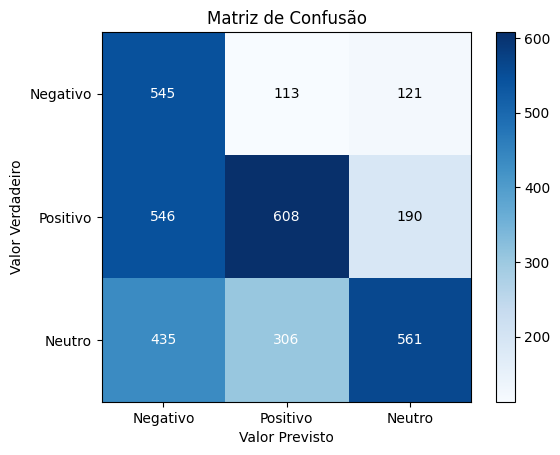

In [99]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negativo', 'Positivo', 'Neutro'],
       yticklabels=['Negativo', 'Positivo', 'Neutro'],
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

#### 8.3.4 - Hiperparâmetros com Random Search do Naive Bayes

In [100]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.metrics import recall_score

# Função de treinamento Naive Bayes
def classification_naive_bayes(X, Y):
    # Divisão do DataFrame em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

    # Definindo os hiperparâmetros a serem otimizados
    param_dist = {'var_smoothing': uniform(1e-20, 1e-2)}  # Intervalo para o hiperparâmetro var_smoothing

    # Criação do classificador Naive Bayes
    clf = GaussianNB()

    # Realização da busca aleatória com validação cruzada
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = random_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Treinamento do classificador utilizando os melhores hiperparâmetros
    clf = GaussianNB(**best_params)
    clf.fit(X_train, y_train)

    # Previsões nos dados de teste
    y_pred = clf.predict(X_test)

    # Cálculo do recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Retorno do recall, y_test, y_pred
    return recall, y_test, y_pred

# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
Y = np.array(dfrnn_balanced['sentimento2'])

# Chamada da função com os dados balanceados
recall, y_test, y_pred = classification_naive_bayes(X, Y)

# Imprime o recall
print("Recall:", recall)


Melhores hiperparâmetros: {'var_smoothing': 0.0005808361216819946}
Recall: 0.4992700729927007


#### 8.3.5 - Aplicando o hiperparâmetro

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler

# Balanceamento dos dados
df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

# Realizar oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Criação do classificador Naive Bayes com o melhor hiperparâmetro
clf = GaussianNB(var_smoothing=0.0005808361216819946)

# Treinamento do classificador
clf.fit(X_train, y_train)

# Previsões nos dados de teste
y_pred = clf.predict(X_test)

# Cálculo do recall
recall = recall_score(y_test, y_pred, average='macro')

# Imprimir o resultado do recall
print("Recall:", recall)


Recall: 0.5358134240535136


### 8.4 - SVM - Três categorias e sem balanceamento

#### 8.4.1 - Definição da Função

In [102]:
def classification_svm(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo SVM
  modelo_svm = SVC()
  modelo_svm.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_svm.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_svm, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_svm, y_test, y_pred

#### 8.4.2 - Teste da Função

In [103]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_svm(x, y)

Acurácia: 0.6037956204379562
F-score: 0.585549218791849
Recall: 0.5797738449355753
Acurácia da Validação Cruzada: 0.6140166447656592


#### 8.4.3 - Matriz de confusão

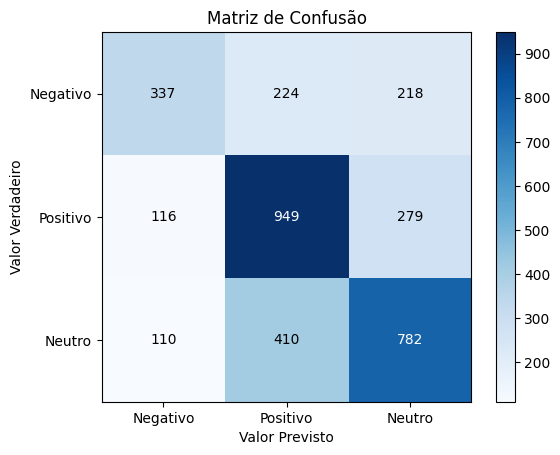

In [104]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
    df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
    df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Imprimir o resultado do recall
    print("Recall:", recall)

    return modelo_svm, y_test, y_pred


In [106]:
print("Melhores hiperparâmetros:", best_params)


Melhores hiperparâmetros: {'batch_size': 120, 'learning_rate': 0.1, 'num_epochs': 22, 'num_hidden_units': 228}


#### 8.4.4 - Aplicando os Melhores Hiperparâmetros

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import RandomOverSampler

def classification_svm(x, y):
    # Balanceamento dos dados
    df_negative = dfoneHot[dfoneHot['sentimento2'] == 0]
    df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
    df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

    # Realizar oversampling
    ros = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = ros.fit_resample(x, y)

    # Dividir o conjunto de dados em treinamento e teste
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

    # Definir os hiperparâmetros a serem testados
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Criar o modelo SVM
    svm = SVC()

    # Criar o scorer utilizando o recall como métrica
    scorer = make_scorer(recall_score, average='macro')

    # Realizar a busca de grade com validação cruzada
    grid_search = GridSearchCV(svm, param_grid=param_grid, scoring=scorer, cv=5)
    grid_search.fit(x_train, y_train)

    # Melhores hiperparâmetros encontrados
    best_params = grid_search.best_params_
    print("Melhores hiperparâmetros:", best_params)

    # Acessar o valor específico do melhor hiperparâmetro
    best_C = best_params['C']
    print("Melhor valor de C:", best_C)

    # Treinar o modelo SVM utilizando os melhores hiperparâmetros
    modelo_svm = SVC(**best_params)
    modelo_svm.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_svm.predict(x_test)

    # Calcular o recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calcular a porcentagem do recall
    recall_percent = recall * 100

    # Imprimir o resultado do recall em porcentagem
    print("Recall: {:.2f}%".format(recall_percent))

    return modelo_svm, y_test, y_pred

# Chamar a função com os dados balanceados
classification_svm(X, Y)


Melhores hiperparâmetros: {'C': 100}
Melhor valor de C: 100
Recall: 65.39%


(SVC(C=100), array([0, 2, 2, ..., 1, 1, 0]), array([0, 2, 2, ..., 1, 1, 0]))

### 8.5 - Random forest - Três categorias e sem balanceamento

#### 8.5.1 - Definição da função

In [108]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

#### 8.5.2 - Teste da função

In [109]:
# Balanceamento dos dados
df_negativo = dfoneHot[dfoneHot['sentimento2'] == 0]
df_positive = dfoneHot[dfoneHot['sentimento2'] == 1]
df_neutral = dfoneHot[dfoneHot['sentimento2'] == 2]

dfrnn_balanced = pd.concat([df_negative, df_positive, df_neutral])

# Definir os arrays x e y
x = np.array(dfrnn_balanced.drop(['Frase', 'sentimento2', 'comentário', 'resposta', 'marcação'], axis=1))
y = np.array(dfrnn_balanced['sentimento2'])

model, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.6616058394160584
F-score: 0.6470530761602004
Recall: 0.6430922695868967
Acurácia da Validação Cruzada: 0.6415243101182654


#### 8.5.3 - Matriz de confusão

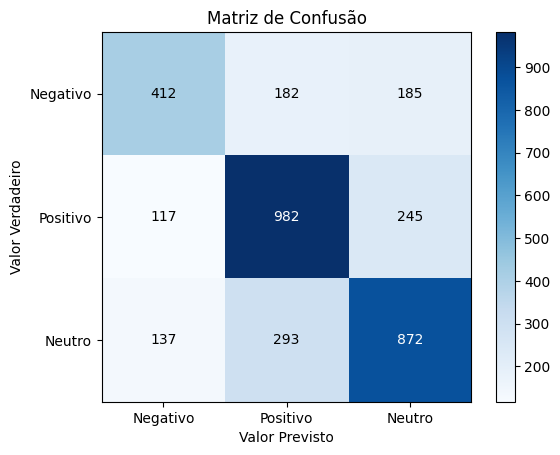

In [110]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### 8.6 - Conclusão
Por fim, foi possível concluir que após a aplicação das novas features não houve melhora dos modelos, mas sim a piora das métricas. Por isso concluímos que vamos manter utilizando as features principais, sendo elas "frase" e "sentimento2".

## Gráficos de disperção de sentimento X tipo interação e gráficos comparando os resultados dos modelos (de barra)

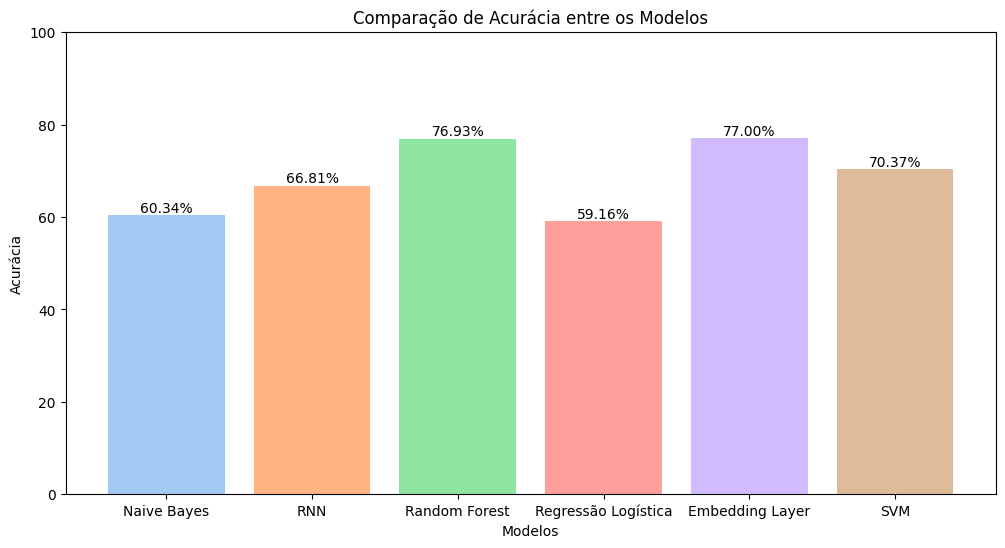

In [111]:
# Valores de revocação para cada modelo
acuracia = [60.34, 66.81, 76.93, 59.16, 77.00, 70.37]

# Rótulos dos modelos
modelos = ['Naive Bayes', 'RNN', 'Random Forest', 'Regressão Logística', 'Embedding Layer', 'SVM']

# Paleta de cores suaves
cores = sns.color_palette('pastel')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(modelos, acuracia, color=cores)

# Adicionar os valores de revocação acima das barras
for i in range(len(modelos)):
    plt.text(i, acuracia[i], f'{acuracia[i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre os Modelos')

# Ajustar os limites dos eixos
plt.ylim(0, 100)

# Mostrar o gráfico
plt.show()


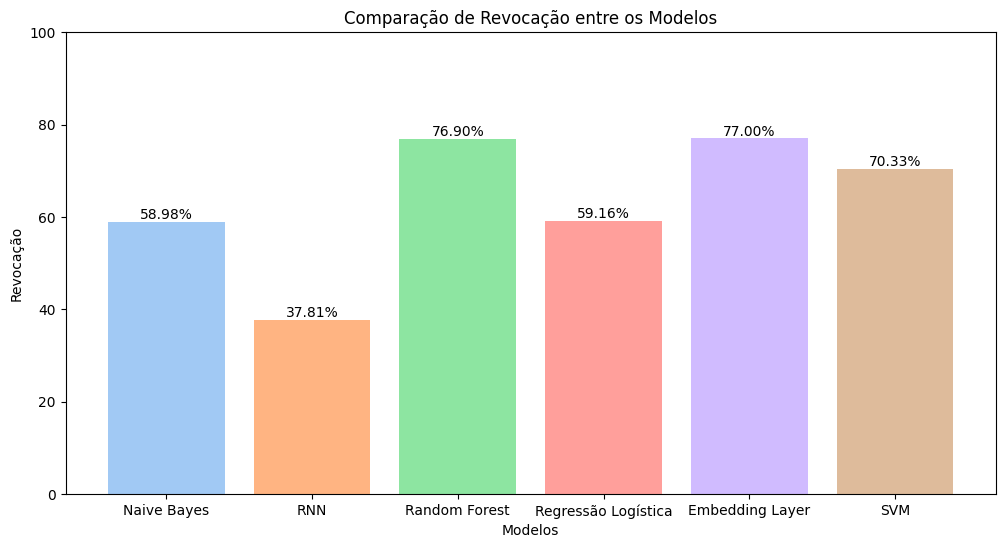

In [112]:
# Valores de revocação para cada modelo
revocacao = [58.98, 37.81, 76.90, 59.16, 77.00, 70.33]

# Rótulos dos modelos
modelos = ['Naive Bayes', 'RNN', 'Random Forest', 'Regressão Logística', 'Embedding Layer', 'SVM']

# Paleta de cores suaves
cores = sns.color_palette('pastel')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(modelos, revocacao, color=cores)

# Adicionar os valores de revocação acima das barras
for i in range(len(modelos)):
    plt.text(i, revocacao[i], f'{revocacao[i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Modelos')
plt.ylabel('Revocação')
plt.title('Comparação de Revocação entre os Modelos')

# Ajustar os limites dos eixos
plt.ylim(0, 100)

# Mostrar o gráfico
plt.show()


In [113]:
import matplotlib.pyplot as plt

# Contagem dos sentimentos por tipo de interação
sentimento_count = base_tratada.groupby(['tipoInteracao', 'sentimento']).size().unstack()

# Criação do gráfico de barras empilhadas
sentimento_count.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'blue', 'green'])

# Configurações do gráfico
plt.xlabel('Tipo de Interação')
plt.ylabel('Quantidade')
plt.title('Distribuição de Sentimentos por Tipo de Interação')
plt.legend(title='Sentimento', loc='upper right')

# Rotação dos rótulos do eixo x
plt.xticks(rotation=0)

# Exibição do gráfico
plt.show()


NameError: ignored